# **Week 12 notebook**

# **Week 12 in R code**

In [3]:
# Slide 8:
skulls<-read.csv2("../data/skulls2.csv")[,-1]
skulls$epoch<-as.factor(paste(rep(1:5,each=30),skulls$epoch,sep="-"))

summary(skulls)

       epoch          MB            BH              BL               NH       
 1-c4000BC:30   Min.   :119   Min.   :120.0   Min.   : 81.00   Min.   :44.00  
 2-c3300BC:30   1st Qu.:131   1st Qu.:129.0   1st Qu.: 93.00   1st Qu.:49.00  
 3-c1850BC:30   Median :134   Median :133.0   Median : 96.00   Median :51.00  
 4-c200BC :30   Mean   :134   Mean   :132.5   Mean   : 96.46   Mean   :50.93  
 5-cAD150 :30   3rd Qu.:137   3rd Qu.:136.0   3rd Qu.:100.00   3rd Qu.:53.00  
                Max.   :148   Max.   :145.0   Max.   :114.00   Max.   :60.00  

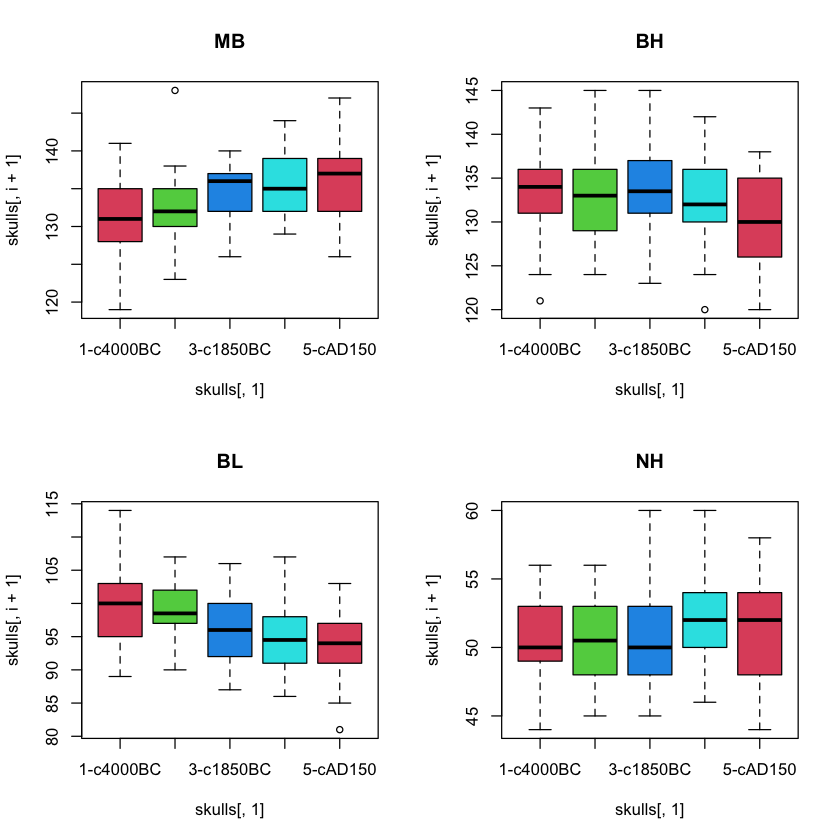

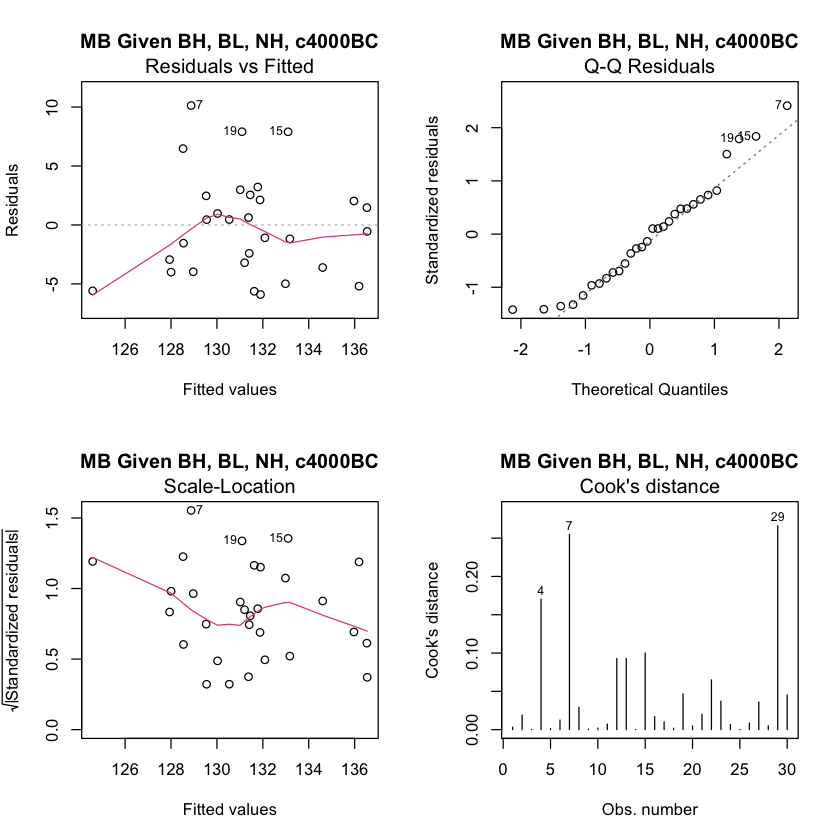

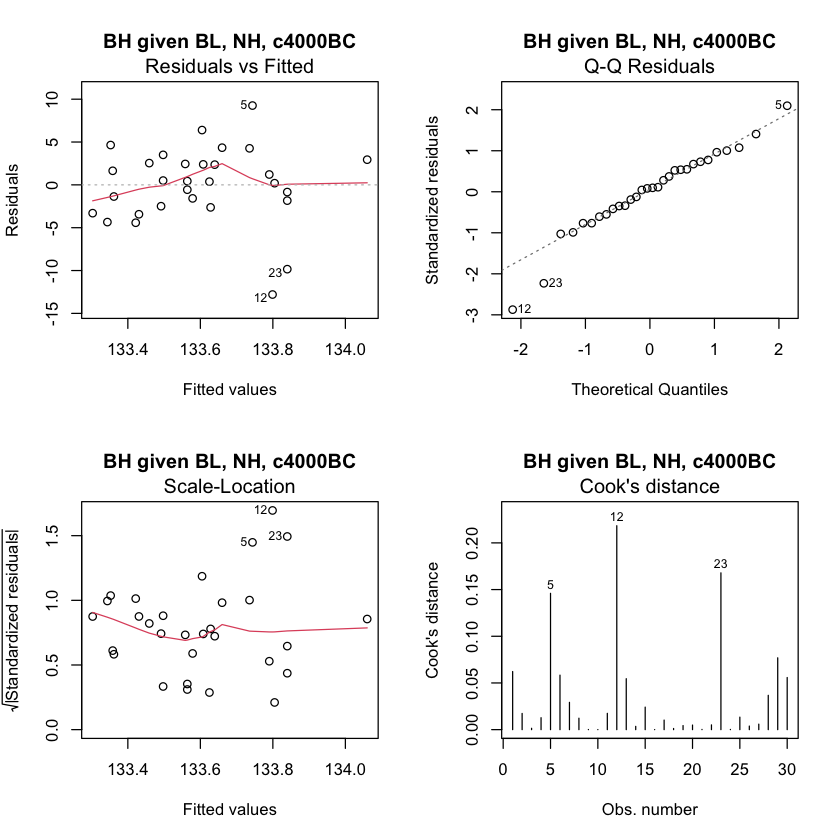

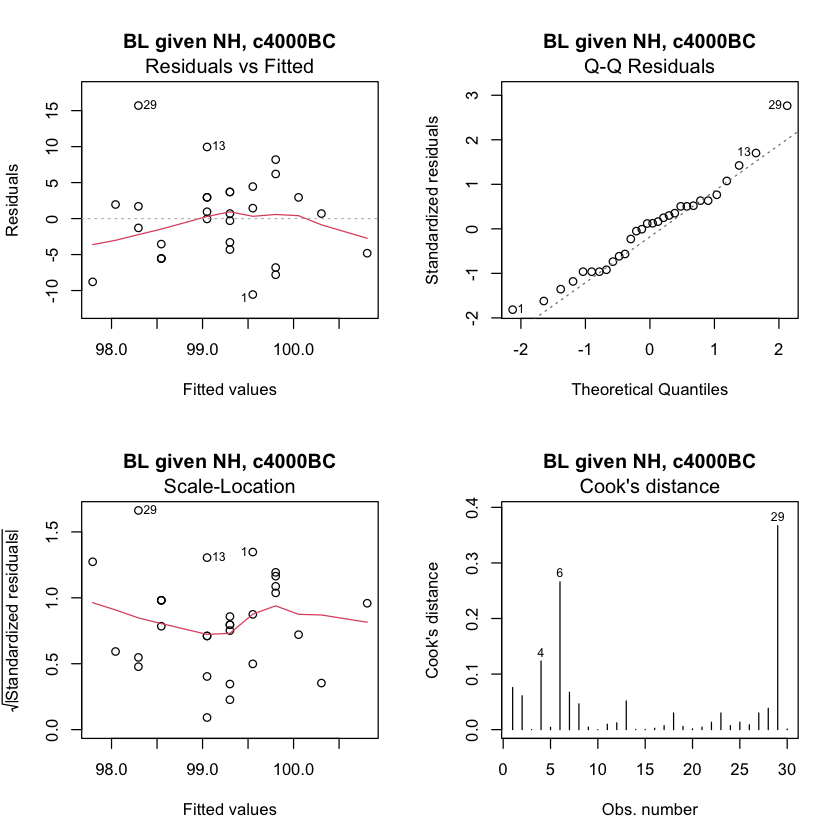

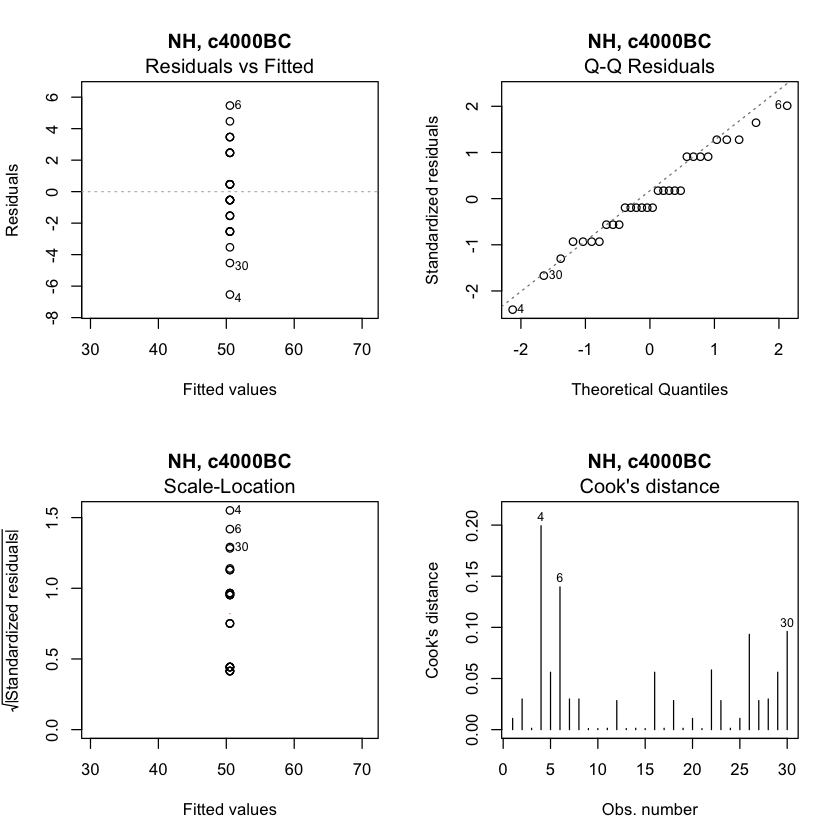

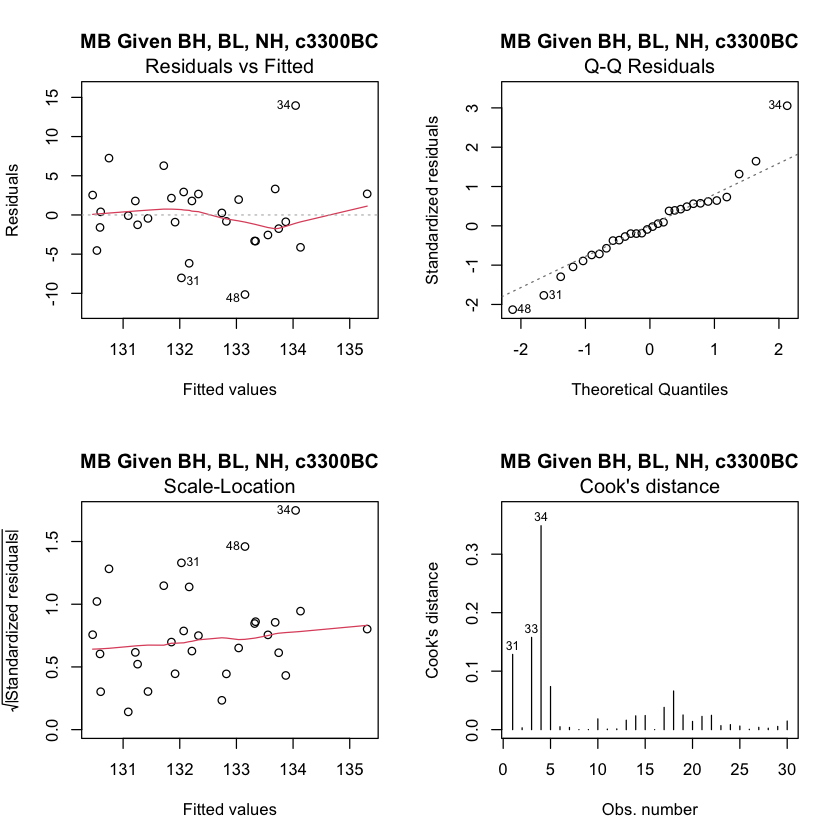

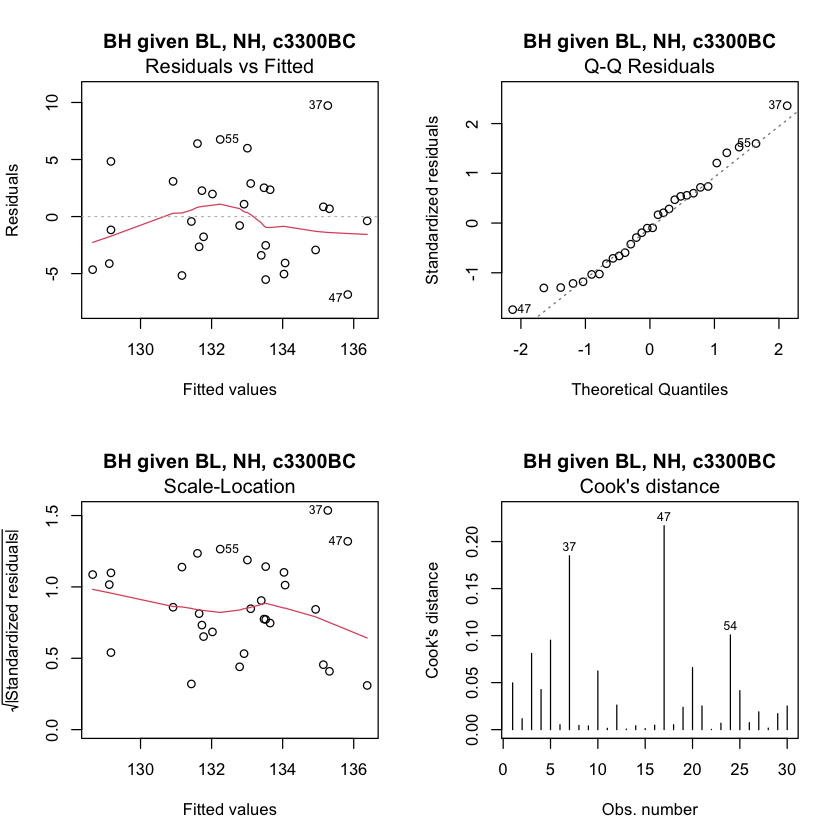

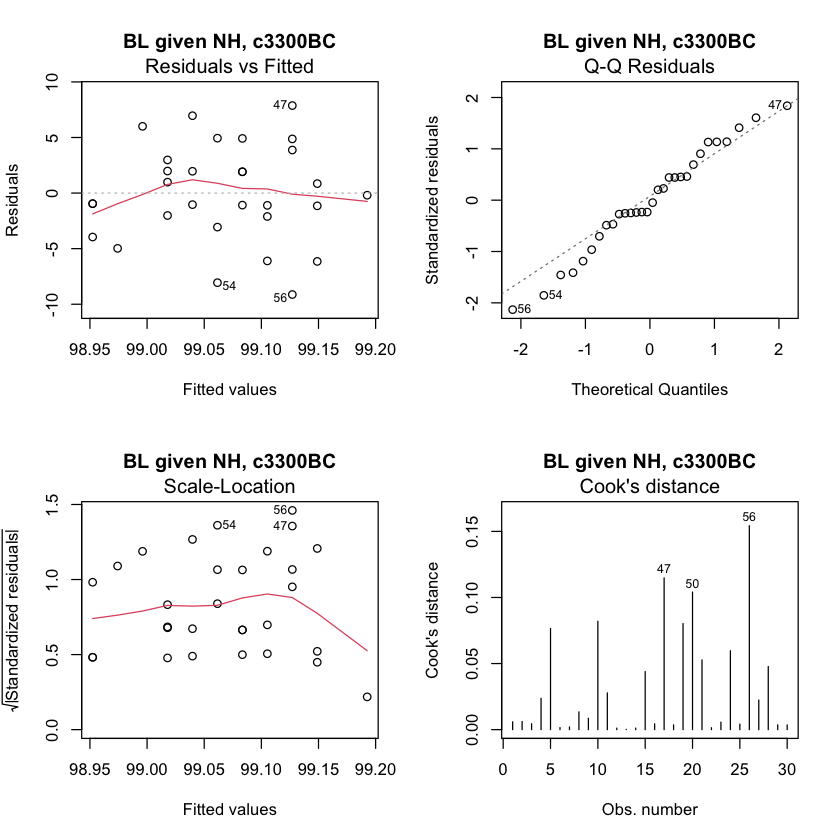

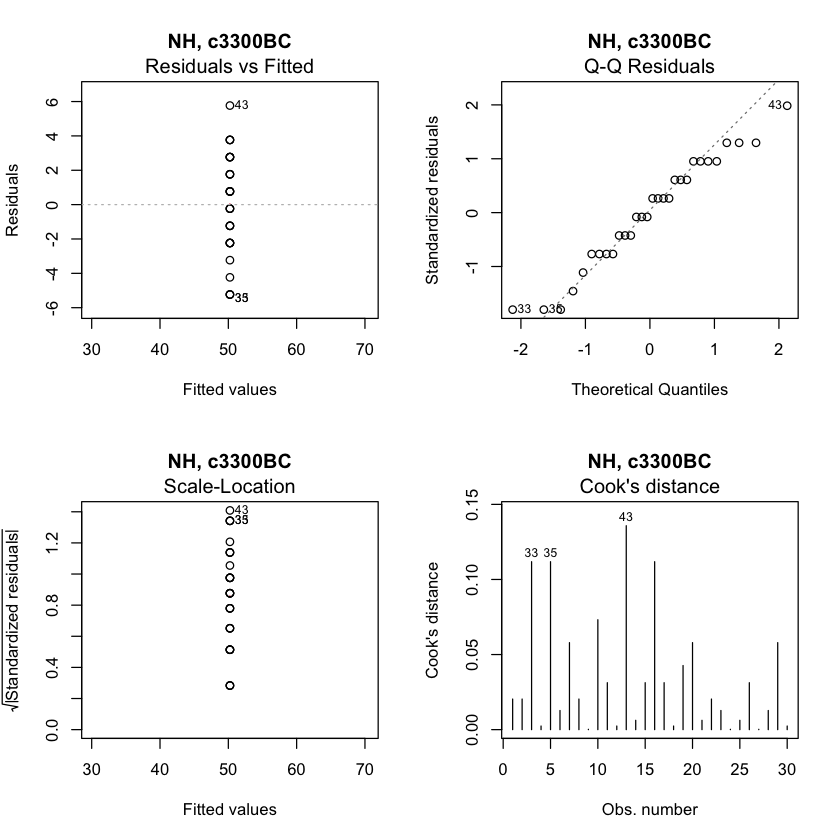

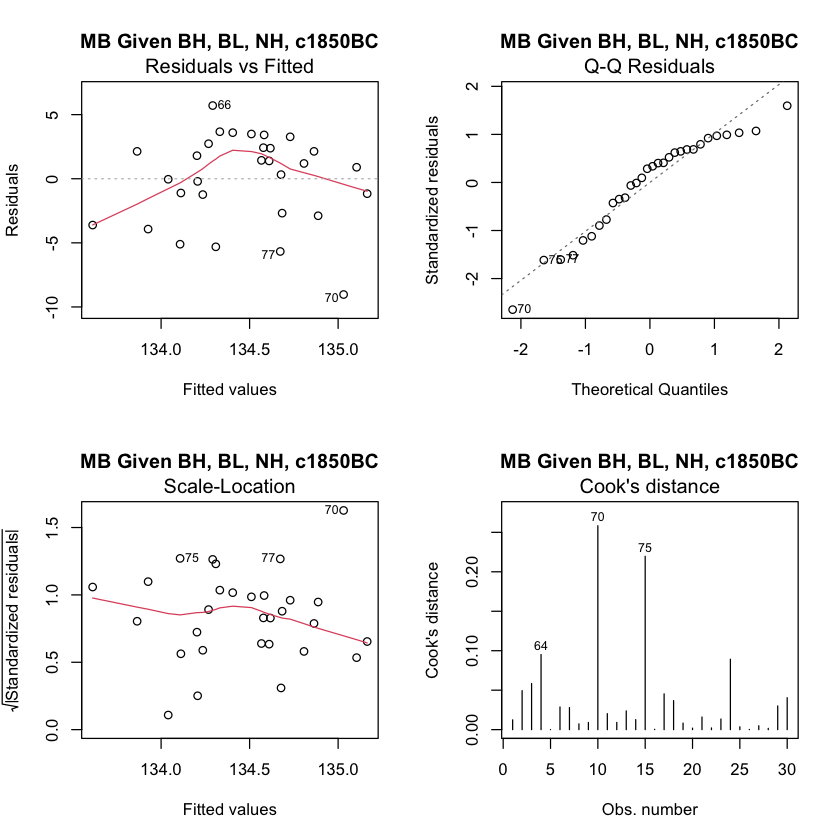

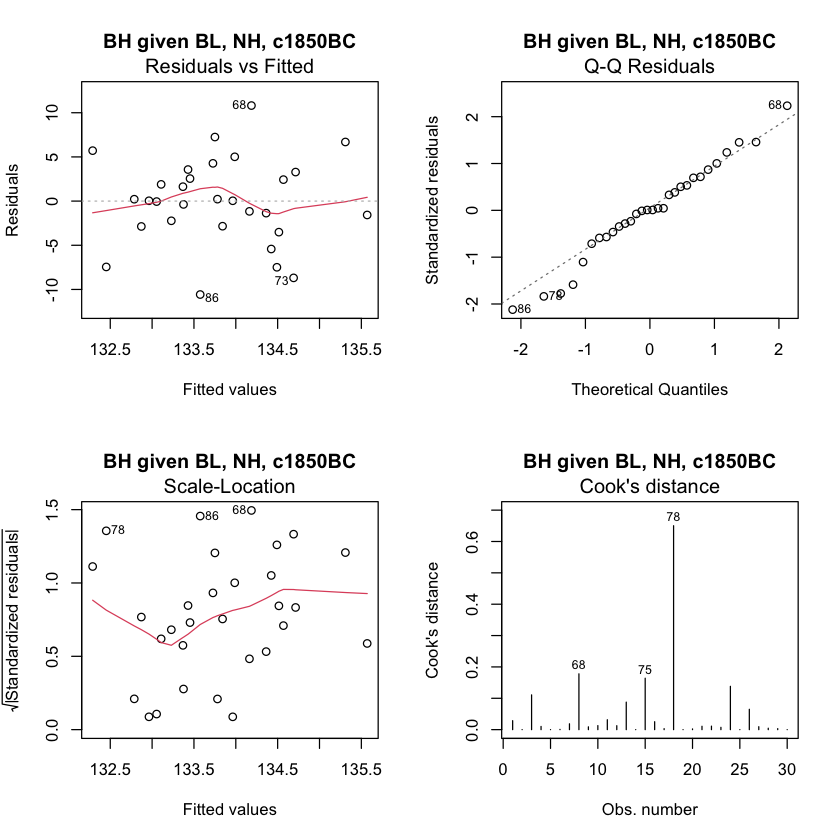

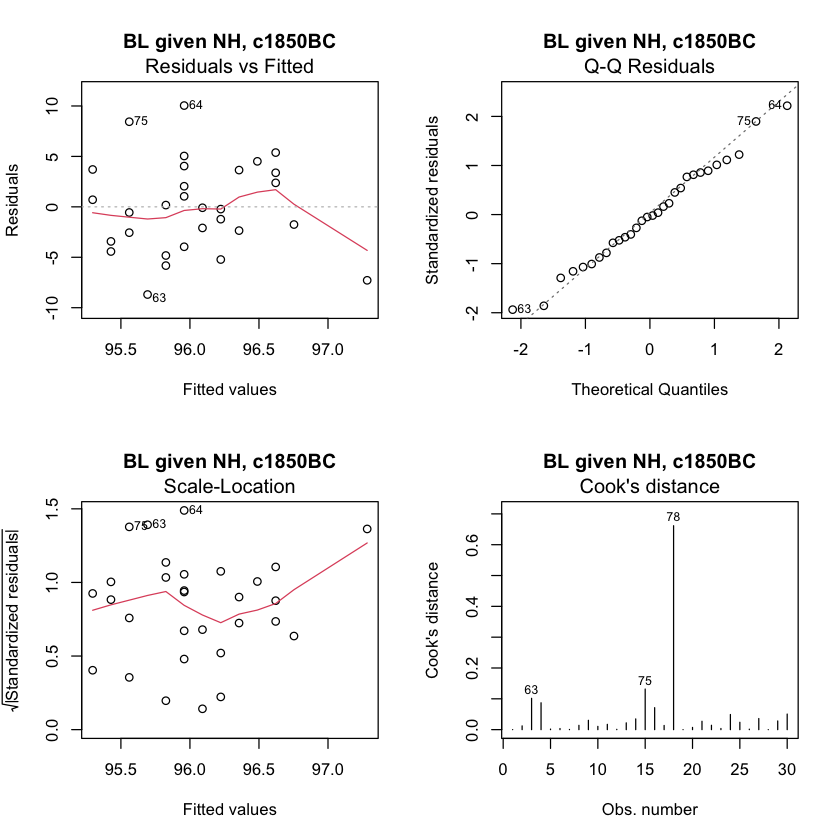

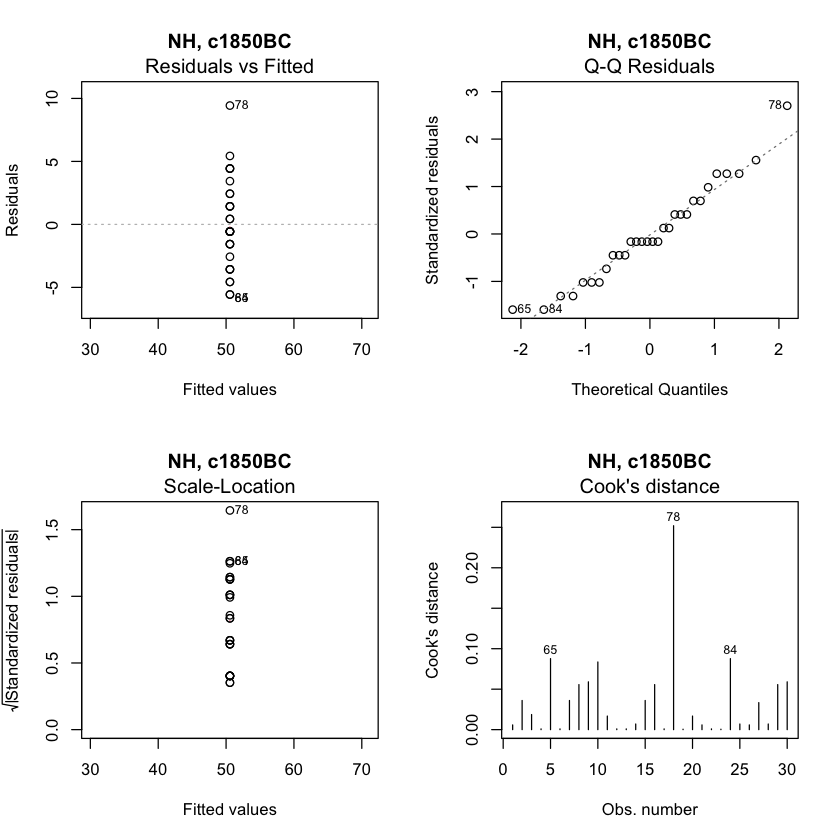

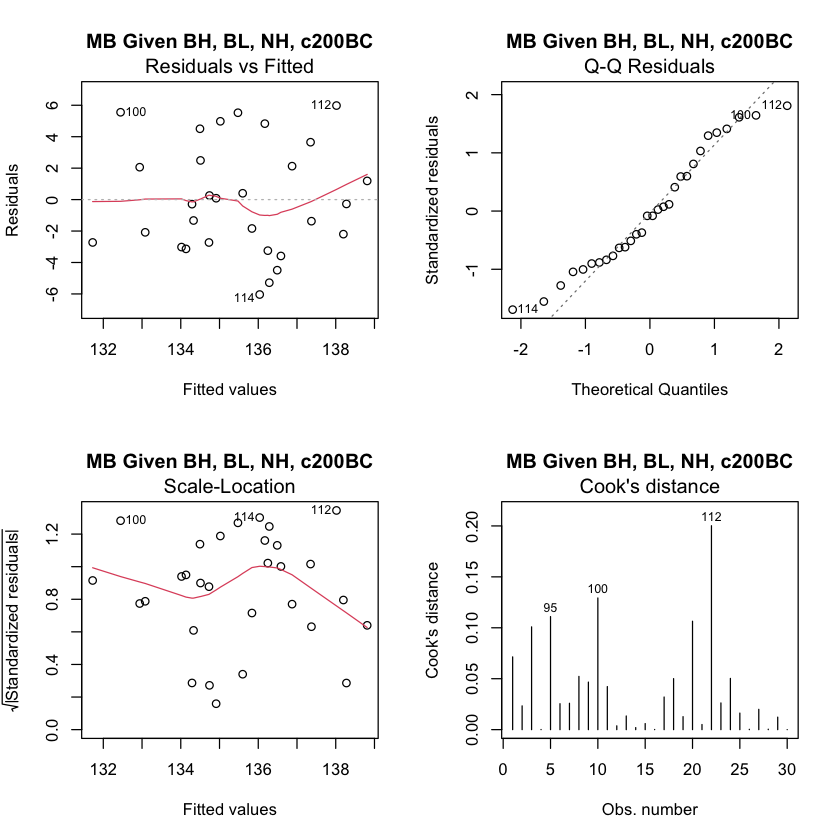

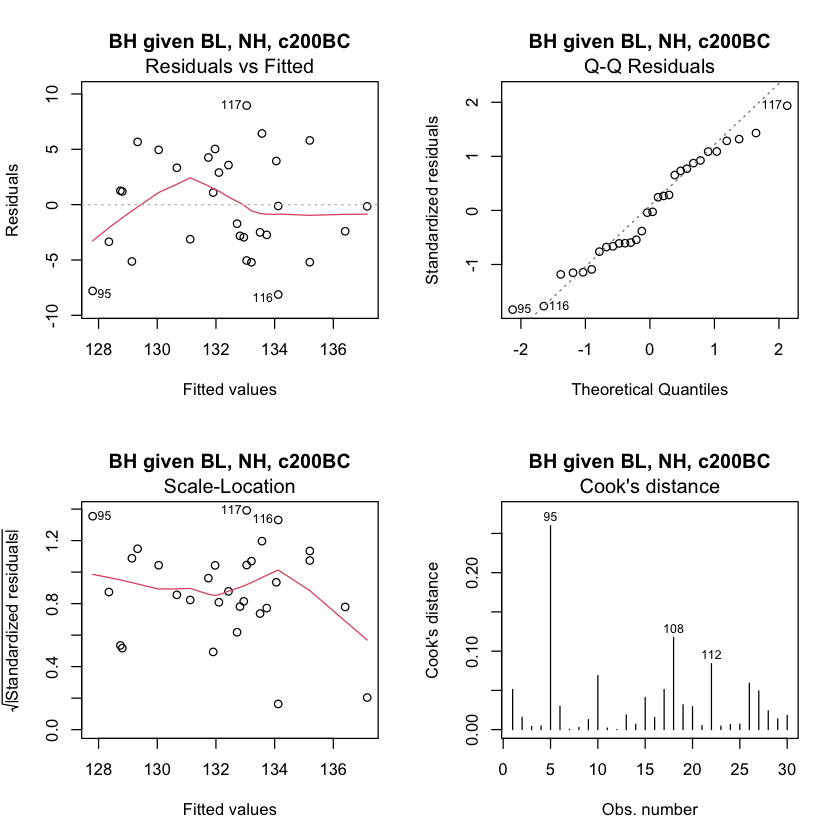

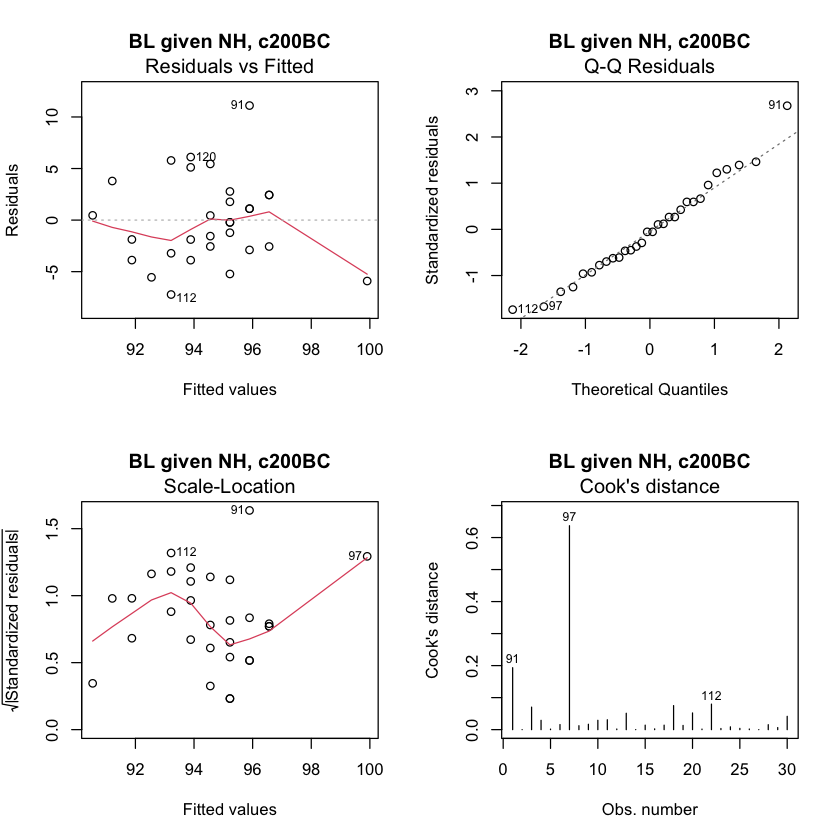

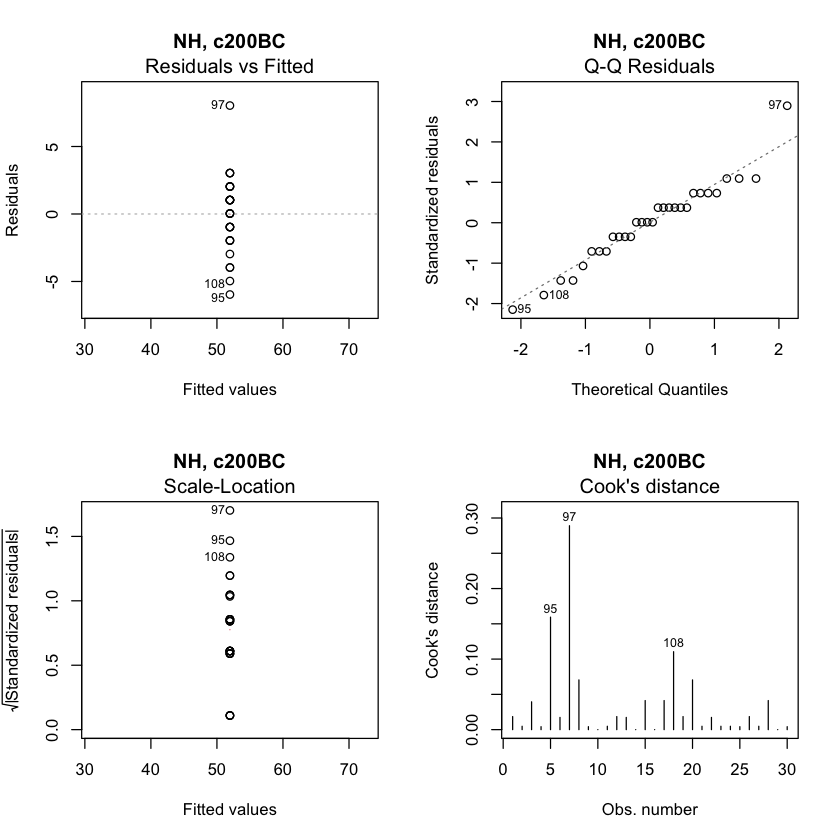

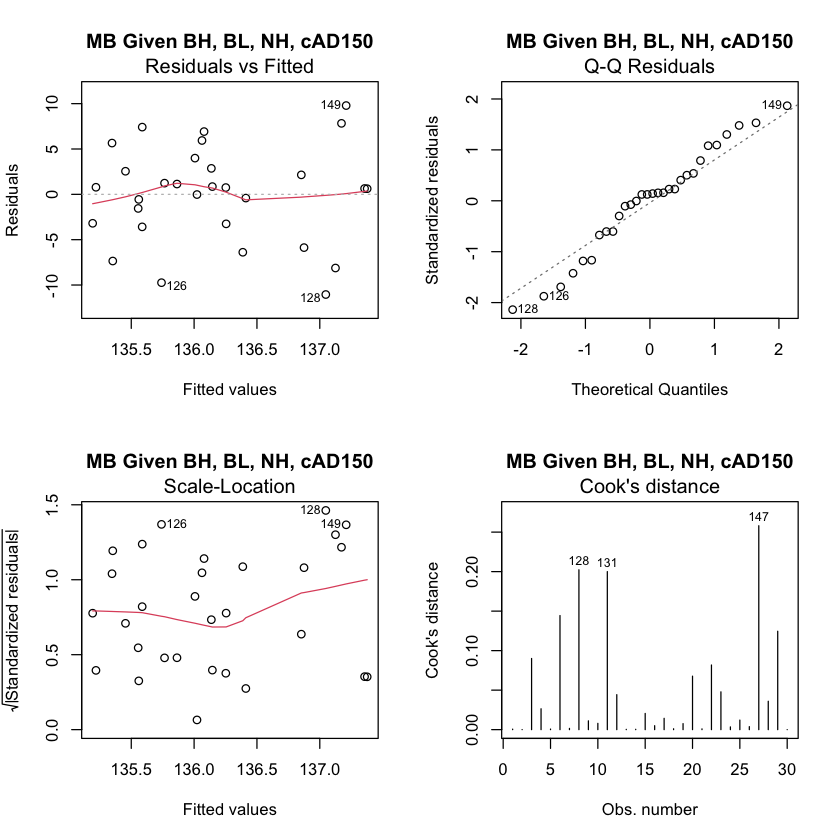

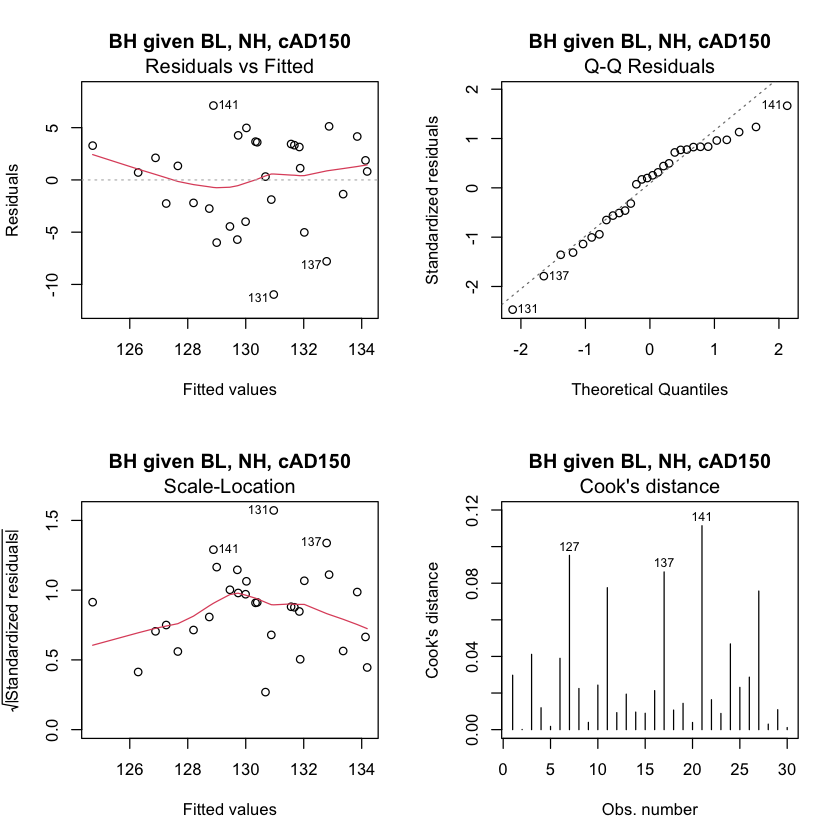

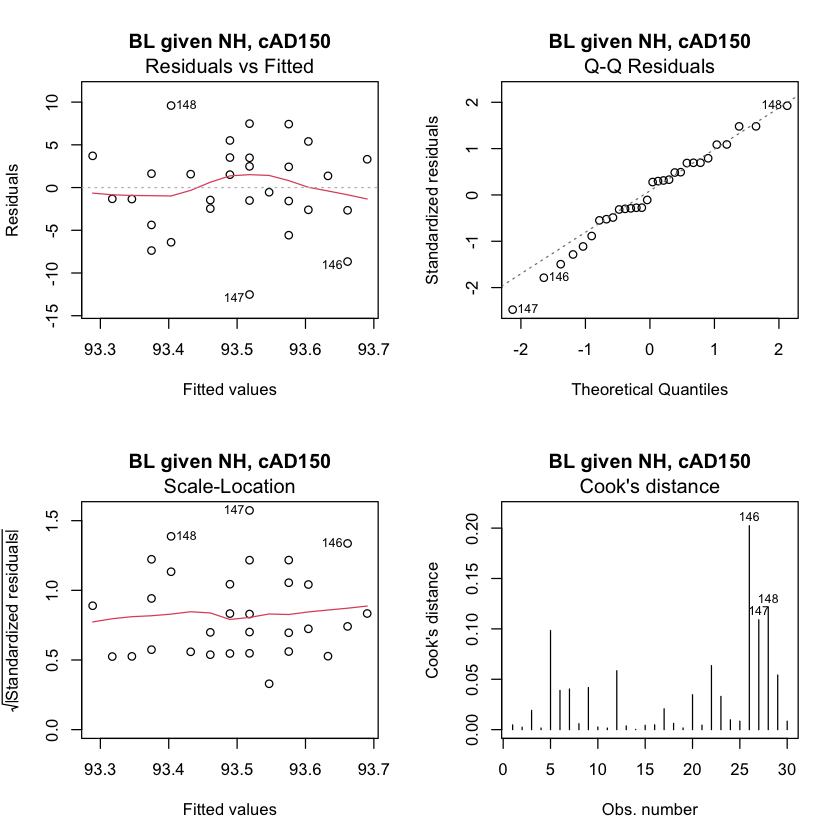

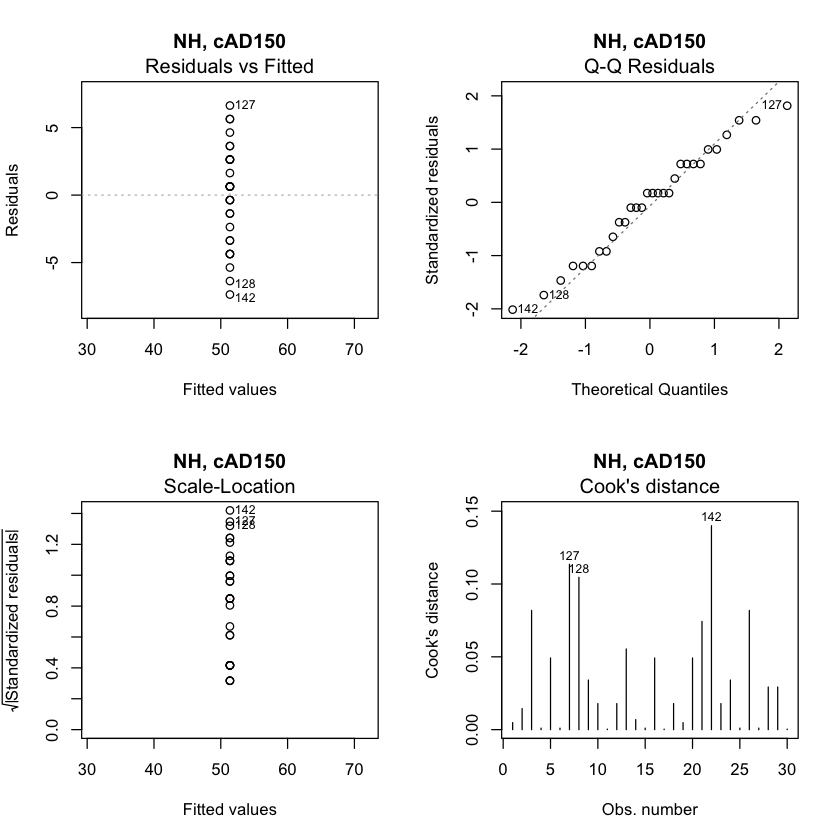

In [4]:
# Slide 9:
par(mfrow=c(2,2))
for(i in 1:4){boxplot(skulls[,i+1]~skulls[,1],col=2:5,main=names(skulls)[i+1])}

############################
# Detailed model control, not on slides:

model.11<-lm(MB~BH+BL+NH,data=skulls[skulls$epoch==levels(skulls$epoch)[1],])
model.12<-lm(BH~BL+NH,data=skulls[skulls$epoch==levels(skulls$epoch)[1],])
model.13<-lm(BL~NH,data=skulls[skulls$epoch==levels(skulls$epoch)[1],])
model.14<-lm(NH~1,data=skulls[skulls$epoch==levels(skulls$epoch)[1],])

plot(model.11,which=1:4, main="MB Given BH, BL, NH, c4000BC")
plot(model.12,which=1:4, main="BH given BL, NH, c4000BC")
plot(model.13,which=1:4, main="BL given NH, c4000BC")
plot(model.14,which=1:4, main="NH, c4000BC")


model.21<-lm(MB~BH+BL+NH,data=skulls[skulls$epoch==levels(skulls$epoch)[2],])
model.22<-lm(BH~BL+NH,data=skulls[skulls$epoch==levels(skulls$epoch)[2],])
model.23<-lm(BL~NH,data=skulls[skulls$epoch==levels(skulls$epoch)[2],])
model.24<-lm(NH~1,data=skulls[skulls$epoch==levels(skulls$epoch)[2],])

plot(model.21,which=1:4, main="MB Given BH, BL, NH, c3300BC")
plot(model.22,which=1:4, main="BH given BL, NH, c3300BC")
plot(model.23,which=1:4, main="BL given NH, c3300BC")
plot(model.24,which=1:4, main="NH, c3300BC")


model.31<-lm(MB~BH+BL+NH,data=skulls[skulls$epoch==levels(skulls$epoch)[3],])
model.32<-lm(BH~BL+NH,data=skulls[skulls$epoch==levels(skulls$epoch)[3],])
model.33<-lm(BL~NH,data=skulls[skulls$epoch==levels(skulls$epoch)[3],])
model.34<-lm(NH~1,data=skulls[skulls$epoch==levels(skulls$epoch)[3],])

plot(model.31,which=1:4, main="MB Given BH, BL, NH, c1850BC")
plot(model.32,which=1:4, main="BH given BL, NH, c1850BC")
plot(model.33,which=1:4, main="BL given NH, c1850BC")
plot(model.34,which=1:4, main="NH, c1850BC")

model.41<-lm(MB~BH+BL+NH,data=skulls[skulls$epoch==levels(skulls$epoch)[4],])
model.42<-lm(BH~BL+NH,data=skulls[skulls$epoch==levels(skulls$epoch)[4],])
model.43<-lm(BL~NH,data=skulls[skulls$epoch==levels(skulls$epoch)[4],])
model.44<-lm(NH~1,data=skulls[skulls$epoch==levels(skulls$epoch)[4],])

plot(model.41,which=1:4, main="MB Given BH, BL, NH, c200BC")
plot(model.42,which=1:4, main="BH given BL, NH, c200BC")
plot(model.43,which=1:4, main="BL given NH, c200BC")
plot(model.44,which=1:4, main="NH, c200BC")


model.51<-lm(MB~BH+BL+NH,data=skulls[skulls$epoch==levels(skulls$epoch)[5],])
model.52<-lm(BH~BL+NH,data=skulls[skulls$epoch==levels(skulls$epoch)[5],])
model.53<-lm(BL~NH,data=skulls[skulls$epoch==levels(skulls$epoch)[5],])
model.54<-lm(NH~1,data=skulls[skulls$epoch==levels(skulls$epoch)[5],])

plot(model.51,which=1:4, main="MB Given BH, BL, NH, cAD150")
plot(model.52,which=1:4, main="BH given BL, NH, cAD150")
plot(model.53,which=1:4, main="BL given NH, cAD150")
plot(model.54,which=1:4, main="NH, cAD150")

###################################

In [5]:
# Slide 12:

# calculating quantities for Bartlett's test
n<-150
n_i<-rep(30,5)
p<-4
k<-5

my.W<-list()
for(i in 1:5){
  temp<-residuals(manova(cbind(MB,BH,BL,NH)~1,
          data=skulls[skulls$epoch==levels(skulls$epoch)[i],]))
  my.W[[i]]<-t(temp)%*%temp
  }
W<-my.W[[1]]+my.W[[2]]+my.W[[3]]+my.W[[4]]+my.W[[5]]

In [6]:
# Slide 13:

logL<-0
for(i in 1:5){logL<-logL+((n_i[i]-1)/2)*log(det(my.W[[i]]))}
logL<-logL-((n-k)/2)*log(det(W))
logL<-logL+(p*(n-k)/2)*log(n-k)
logL<-logL-sum((p*(n_i-1)/2)*log(n_i-1))

f<-(1/2)*(k-1)*p*(p+1)
rho<-1-(sum(1/n_i)-1/n)*(2*p^2+3*p-1)/(6*(p+1)*(k-1))
omega2<-(1/48)*p*(p+1)*((p-1)*(p+2)*(sum(1/n_i^2)-1/n^2)-6*(k-1)*(1-rho)^2)

# test statistic:
(z<--2*rho*logL)

# p-value:
(1-(pchisq(z,df=f)+omega2*(pchisq(z,df=f+4)-pchisq(z,df=f))))

[1] 45.76321

[1] 0.2465424

In [10]:
# Slide 14:

# install.packages("heplots")
library("heplots")

boxM(skulls[,2:5],skulls[,1])


	Box's M-test for Homogeneity of Covariance Matrices

data:  skulls[, 2:5]
Chi-Sq (approx.) = 45.667, df = 40, p-value = 0.2483


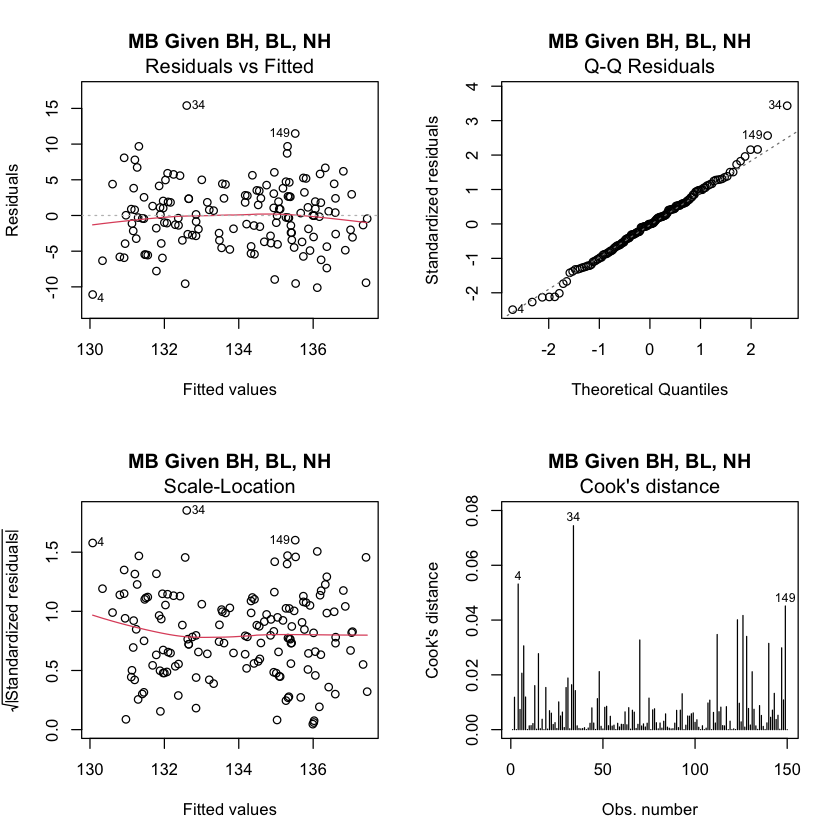

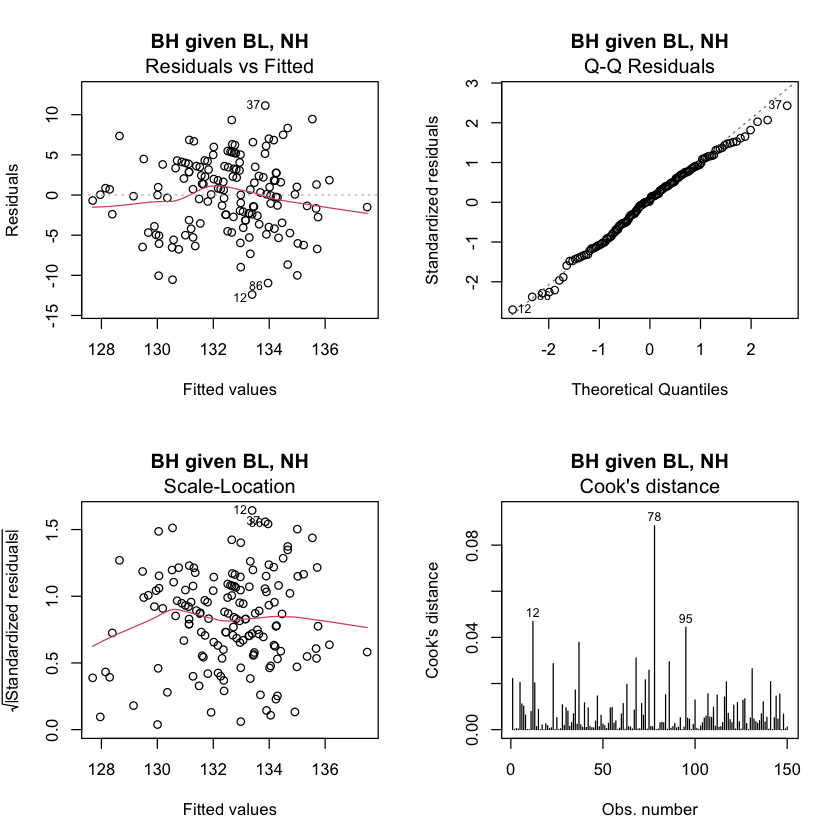

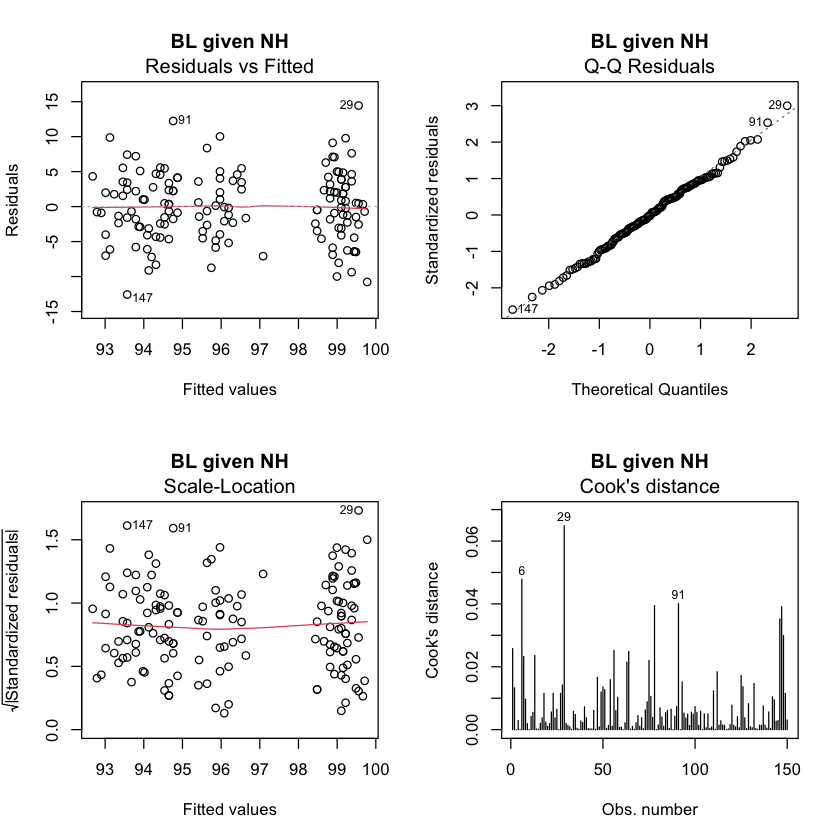

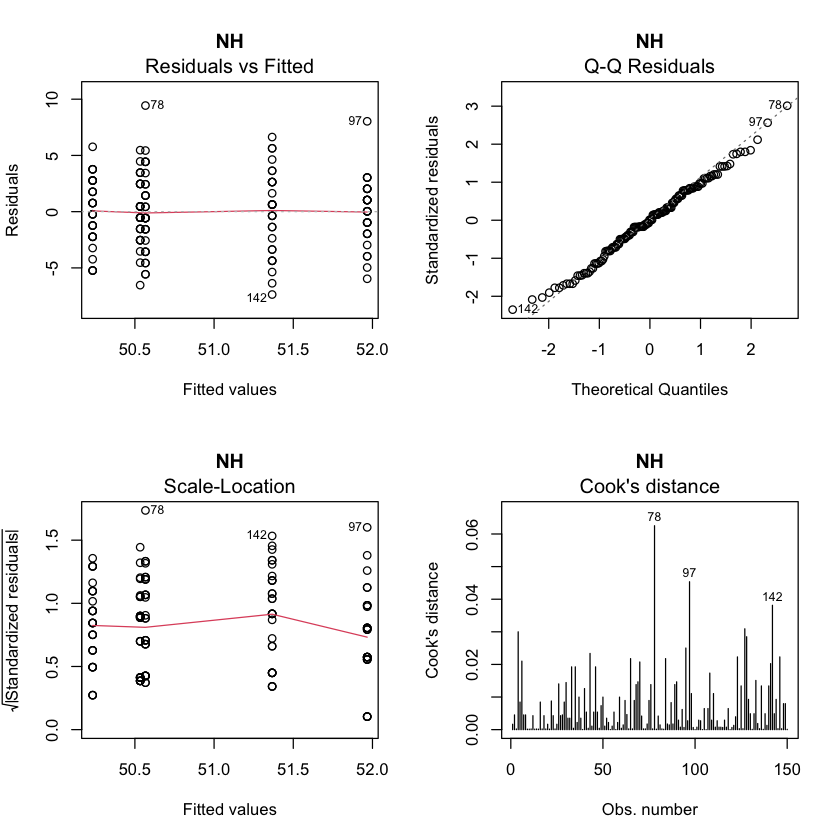

In [11]:
# Slide 16
model.01<-lm(MB~epoch+BH+BL+NH,data=skulls)
model.02<-lm(BH~epoch+BL+NH,data=skulls)
model.03<-lm(BL~epoch+NH,data=skulls)
model.04<-lm(NH~epoch,data=skulls)


par(mfrow=c(2,2))
plot(model.01,which=1:4, main="MB Given BH, BL, NH")
plot(model.02,which=1:4, main="BH given BL, NH")
plot(model.03,which=1:4, main="BL given NH")
plot(model.04,which=1:4, main="NH")

par(mfrow=c(1,1))

In [12]:
# Slide 18:
head(skulls)

,epoch,MB,BH,BL,NH
,<fct>,<int>,<int>,<int>,<int>
1,1-c4000BC,131,138,89,49
2,1-c4000BC,125,131,92,48
3,1-c4000BC,131,132,99,50
4,1-c4000BC,119,132,96,44
5,1-c4000BC,136,143,100,54
6,1-c4000BC,138,137,89,56


In [13]:
# Slide 22:

analysis<-manova(cbind(MB,BH,BL,NH)~epoch,data=skulls)

summary(analysis,test="Wilks")

           Df   Wilks approx F num Df den Df   Pr(>F)    
epoch       4 0.66359   3.9009     16 434.45 7.01e-07 ***
Residuals 145                                            
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [18]:
# Slide 23:

summary(analysis)
summary(analysis,test="Hotelling-Lawley")
summary(analysis,test="Roy")

# print("Pillai", "Wilks", "Hotelling-Lawley", "Roy")

           Df  Pillai approx F num Df den Df    Pr(>F)    
epoch       4 0.35331    3.512     16    580 4.675e-06 ***
Residuals 145                                             
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

           Df Hotelling-Lawley approx F num Df den Df    Pr(>F)    
epoch       4          0.48182    4.231     16    562 8.278e-08 ***
Residuals 145                                                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

           Df    Roy approx F num Df den Df    Pr(>F)    
epoch       4 0.4251    15.41      4    145 1.588e-10 ***
Residuals 145                                            
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [19]:
# Slide 24:

(theta<-coef(manova(cbind(MB,BH,BL,NH)~epoch-1,data=skulls)))

R<-residuals(manova(cbind(MB,BH,BL,NH)~as.factor(epoch),data=skulls))
(Sigma<-(1/(150-5))*t(R)%*%R)

,MB,BH,BL,NH
epoch1-c4000BC,131.3667,133.6000,99.16667,50.53333
epoch2-c3300BC,132.3667,132.7000,99.06667,50.23333
epoch3-c1850BC,134.4667,133.8000,96.03333,50.56667
epoch4-c200BC,135.5000,132.3000,94.53333,51.96667
epoch5-cAD150,136.1667,130.3333,93.50000,51.36667


,MB,BH,BL,NH
MB,21.11080460,0.03678161,0.07908046,2.008966
BH,0.03678161,23.48459770,5.20000000,2.845057
BL,0.07908046,5.20000000,24.17908046,1.133333
NH,2.00896552,2.84505747,1.13333333,10.152644


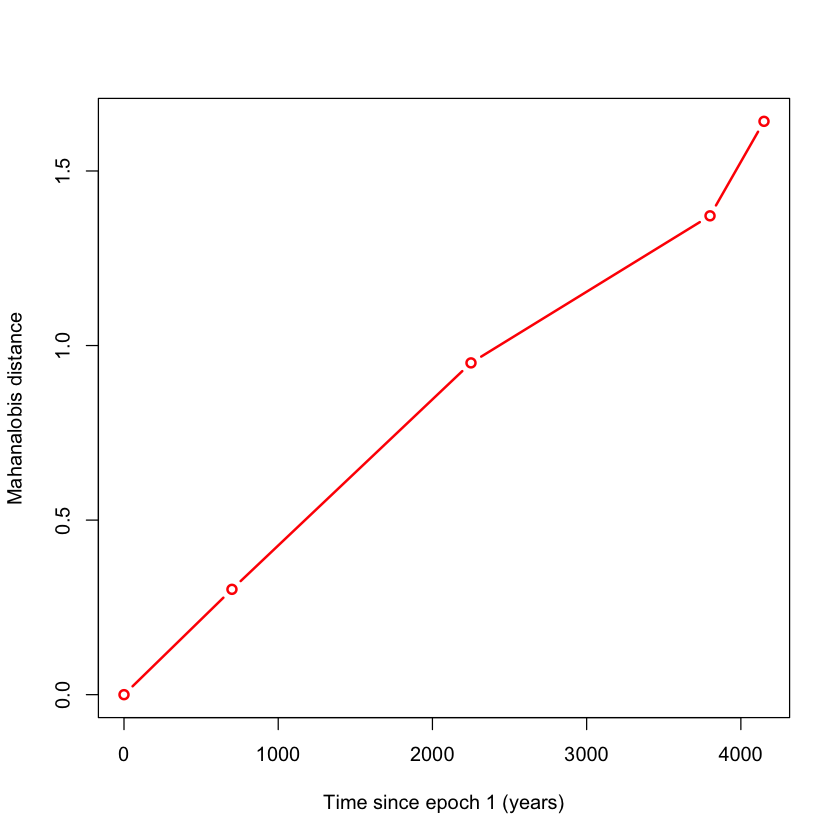

In [20]:
# Slide 25:

mh.dist<-numeric(5)
for(i in 1:5){
  mh.dist[i]<-(theta[i,]-theta[1,])%*%solve(Sigma)%*%t(t((theta[i,]-theta[1,])))
  }
mh.dist<-sqrt(mh.dist)
plot(c(0,700,2250,3800,4150),mh.dist,type="b",
     xlab="Time since epoch 1 (years)",
     ylab="Mahanalobis distance",col="red",lwd=2)

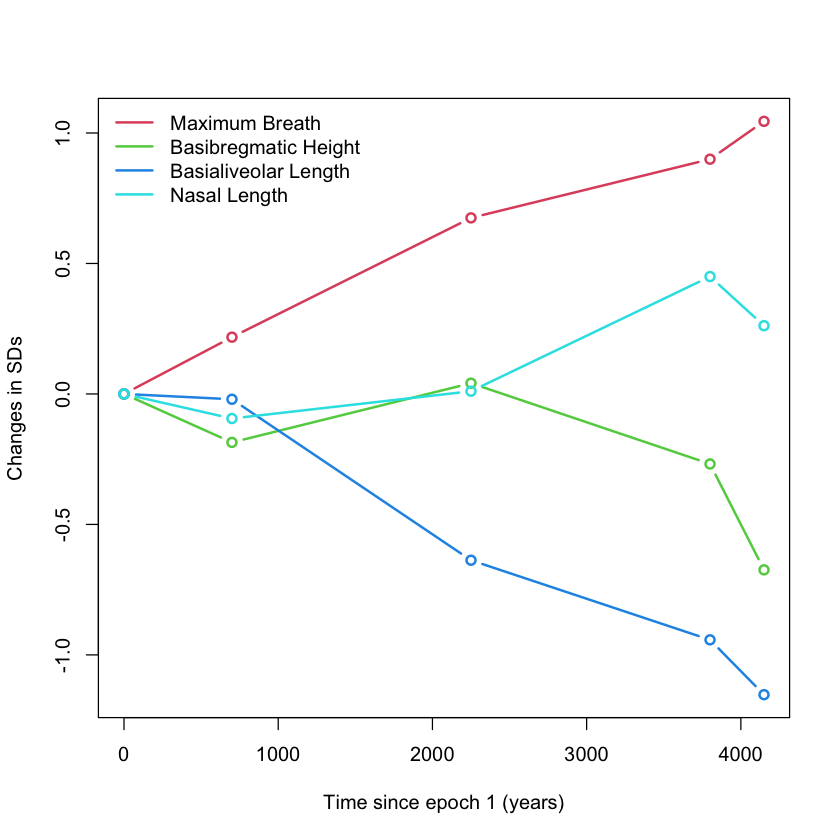

In [21]:
# Slide 26:

plotdata<-as.matrix(theta)-
rbind(theta[1,],theta[1,],theta[1,],theta[1,],theta[1,])
plotdata<-plotdata%*%diag(1/sqrt(diag(Sigma)))

plot(rep(c(0,700,2250,3800,4150),4),plotdata,pch='',     
     xlab="Time since epoch 1 (years)",
     ylab="Changes in SDs")
for(i in 1:4){
  lines(c(0,700,2250,3800,4150),plotdata[,i],type="b",col=i+1,lwd=2)
  }
legend("topleft",c("Maximum Breath",
                   "Basibregmatic Height",
                   "Basialiveolar Length",
                   "Nasal Length"),col=2:5,lty=1,lwd=2,bty="n")

In [24]:
# Slide 37:

yield<-read.table("../data/plantyield.txt",header=T)
yield$Type<-as.factor(yield$Type)
yield$Yield<-as.factor(yield$Yield)
summary(yield)

          Type            Yield         B1               B2        
 Atlantic   :3   Dry matter  :3   Min.   : 0.285   Min.   : 0.330  
 Kayseri    :3   Green matter:3   1st Qu.: 0.369   1st Qu.: 0.357  
 Marchigiana:3   Nitrogen    :3   Median : 9.403   Median :10.914  
                                  Mean   :18.530   Mean   :20.174  
                                  3rd Qu.:40.959   3rd Qu.:47.677  
                                  Max.   :52.475   Max.   :50.757  
       B3               B4               B5               B6        
 Min.   : 0.315   Min.   : 0.259   Min.   : 0.319   Min.   : 0.304  
 1st Qu.: 0.333   1st Qu.: 0.339   1st Qu.: 0.400   1st Qu.: 0.386  
 Median :10.063   Median : 8.944   Median :11.715   Median :11.903  
 Mean   :19.122   Mean   :17.798   Mean   :22.038   Mean   :21.548  
 3rd Qu.:44.950   3rd Qu.:36.919   3rd Qu.:45.859   3rd Qu.:43.838  
 Max.   :50.152   Max.   :51.718   Max.   :60.758   Max.   :58.334  

Type,Block,Dry.matter,Nitrogen,Green.matter
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Marchigiana,B1,9.170,0.286,40.959
Marchigiana,B2,10.683,0.335,47.677
Marchigiana,B3,10.063,0.315,44.950
Marchigiana,B4,8.104,0.259,36.919
Marchigiana,B5,10.018,0.319,45.859
Marchigiana,B6,9.570,0.304,43.838
Kayseri,B1,9.403,0.285,42.475
Kayseri,B2,10.914,0.330,49.546
Kayseri,B3,11.018,0.333,50.152


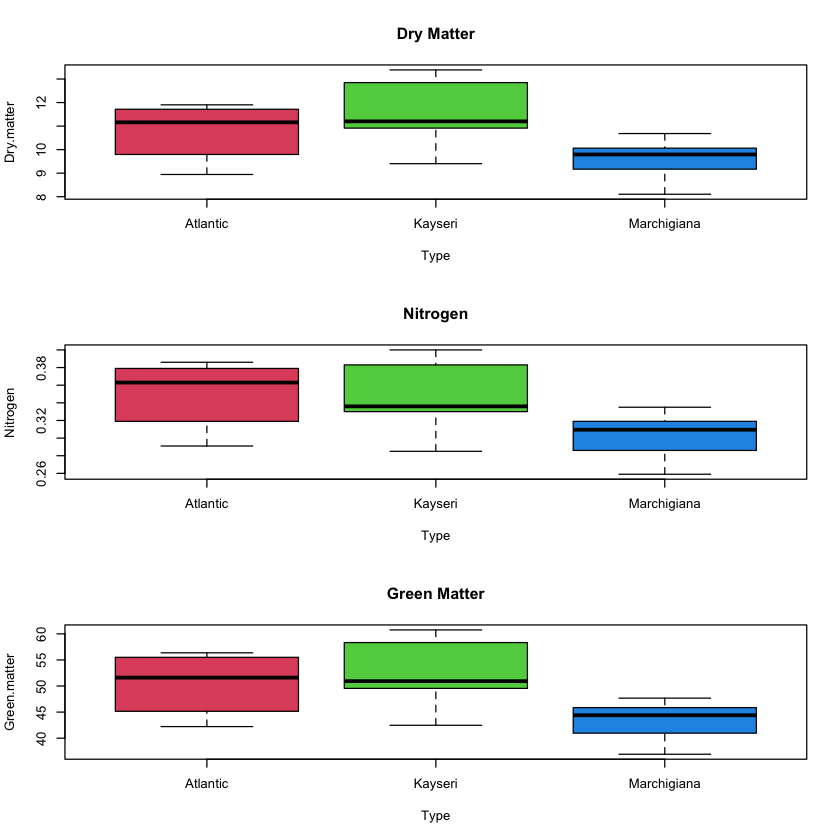

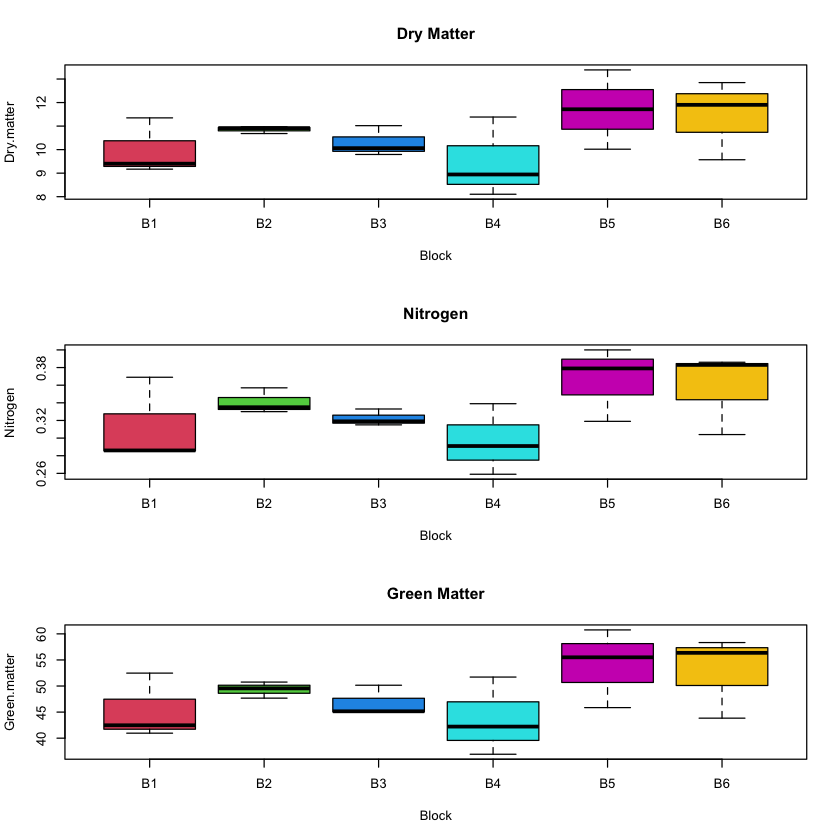

In [25]:
# Slide 39:
yield2<-data.frame(Type=rep(c("Marchigiana","Kayseri","Atlantic"),each=6))
yield2$Block<-rep(paste("B",1:6,sep=""),3)
yield2$Dry.matter<-c(t(yield[c(1,4,7),-(1:2)]))
yield2$Nitrogen<-c(t(yield[c(2,5,8),-(1:2)]))
yield2$Green.matter<-c(t(yield[c(3,6,9),-(1:2)]))
yield2

par(mfrow=c(3,1))
boxplot(Dry.matter~Type,col=2:4,data=yield2,main="Dry Matter")
boxplot(Nitrogen~Type,col=2:4,data=yield2,main="Nitrogen")
boxplot(Green.matter~Type,col=2:4,data=yield2,main="Green Matter")

boxplot(Dry.matter~Block,col=2:7,data=yield2,main="Dry Matter")
boxplot(Nitrogen~Block,col=2:7,data=yield2,main="Nitrogen")
boxplot(Green.matter~Block,col=2:7,data=yield2,main="Green Matter")

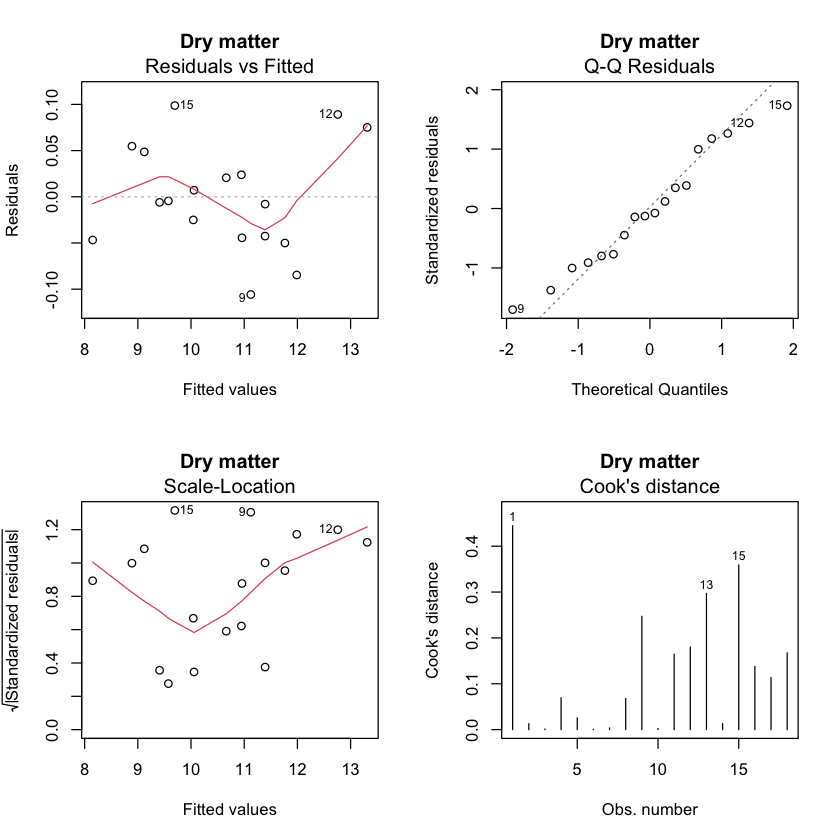

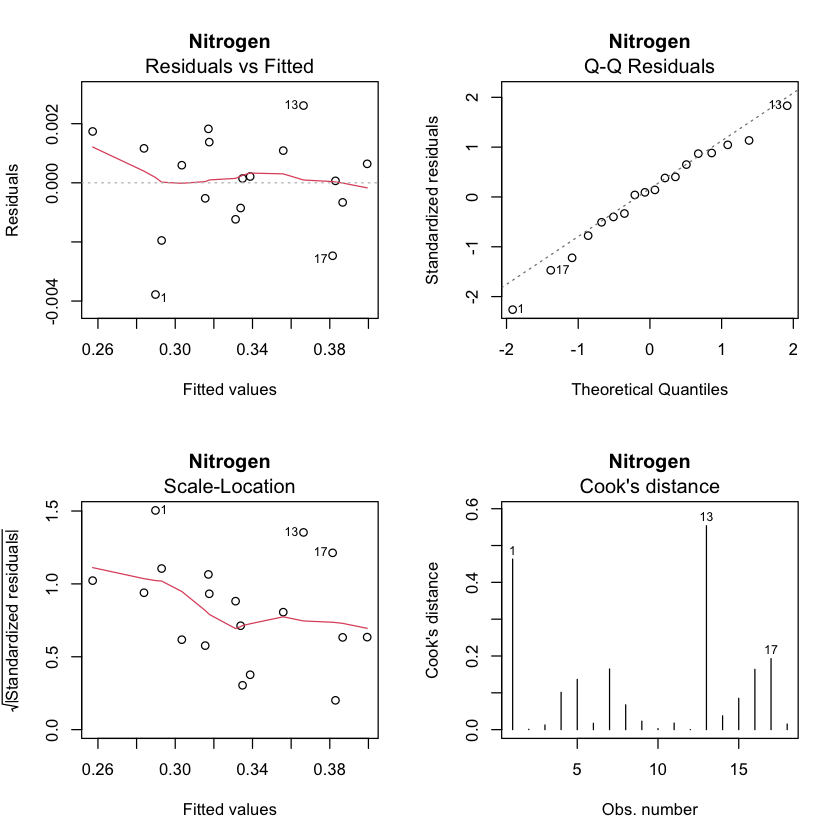

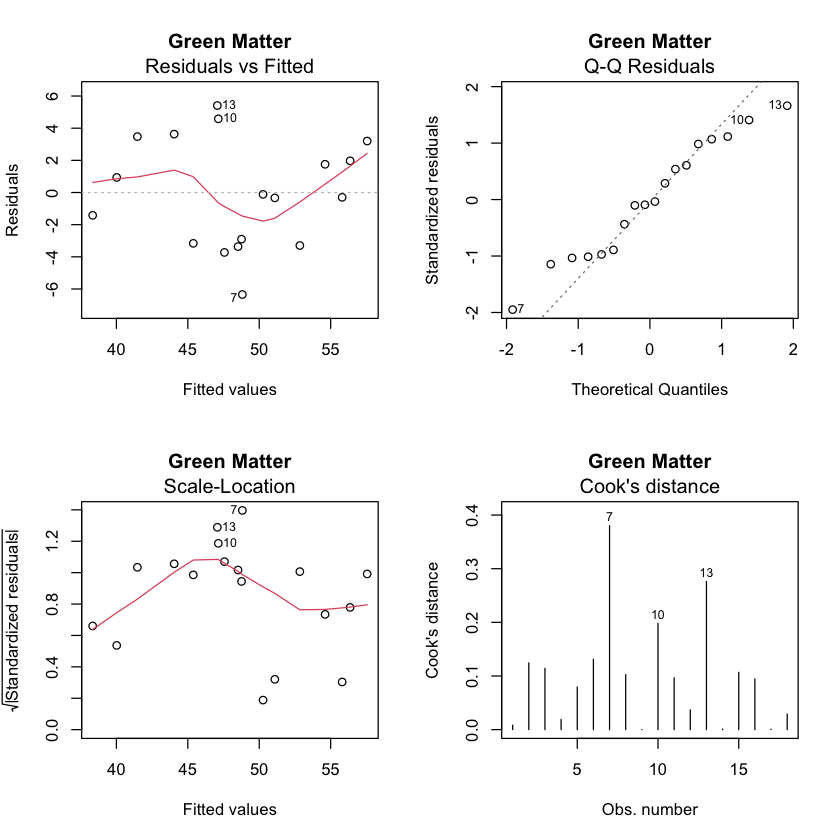

In [26]:
# Slide 40:
analysis.01<-lm(Dry.matter~Type+Block+Nitrogen+Green.matter,data=yield2)
analysis.02<-lm(Nitrogen~Type+Block+Green.matter,data=yield2)
analysis.03<-lm(Green.matter~Type+Block,data=yield2)

par(mfrow=c(2,2))
plot(analysis.01,which=1:4,main="Dry matter")
plot(analysis.02,which=1:4,main="Nitrogen")
plot(analysis.03,which=1:4,main="Green Matter")

In [27]:
# Slide 41:
summary(yield2)
yield2[13,]

     Type              Block             Dry.matter        Nitrogen     
 Length:18          Length:18          Min.   : 8.104   Min.   :0.2590  
 Class :character   Class :character   1st Qu.: 9.626   1st Qu.:0.3068  
 Mode  :character   Mode  :character   Median :10.799   Median :0.3315  
                                       Mean   :10.624   Mean   :0.3327  
                                       3rd Qu.:11.376   3rd Qu.:0.3660  
                                       Max.   :13.387   Max.   :0.4000  
  Green.matter  
 Min.   :36.92  
 1st Qu.:44.12  
 Median :48.61  
 Mean   :48.65  
 3rd Qu.:52.29  
 Max.   :60.76  

,Type,Block,Dry.matter,Nitrogen,Green.matter
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
13,Atlantic,B1,11.349,0.369,52.475


In [28]:
# Slide 42:
analysis<-manova(cbind(Dry.matter,Nitrogen,Green.matter)~Type+Block,data=yield2)

summary(analysis,test="Wilks")

          Df    Wilks approx F num Df den Df    Pr(>F)    
Type       2 0.003326   43.573      6 16.000 4.956e-09 ***
Block      5 0.063013    2.581     15 22.486   0.02055 *  
Residuals 10                                              
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [30]:
# Slide 43:
summary(analysis)$SS$Block
summary(analysis)$SS$Type
summary(analysis)$SS$Residuals

# Total variation
summary(analysis)$SS$Block+
summary(analysis)$SS$Type+
summary(analysis)$SS$Residuals

,Dry.matter,Nitrogen,Green.matter
Dry.matter,11.2182476,0.34801194,53.974649
Nitrogen,0.3480119,0.01080228,1.671297
Green.matter,53.9746487,1.67129667,261.702513


,Dry.matter,Nitrogen,Green.matter
Dry.matter,10.9456041,0.262613278,52.369429
Nitrogen,0.2626133,0.008030778,1.385427
Green.matter,52.3694292,1.385427500,260.173972


,Dry.matter,Nitrogen,Green.matter
Dry.matter,9.9701146,0.286666722,43.454086
Nitrogen,0.2866667,0.008310556,1.255111
Green.matter,43.4540855,1.255111167,190.600538


,Dry.matter,Nitrogen,Green.matter
Dry.matter,32.1339663,0.89729194,149.798163
Nitrogen,0.8972919,0.02714361,4.311835
Green.matter,149.7981633,4.31183533,712.477024


In [31]:
# Slide 44:

analysis.dm<-lm(Dry.matter~Type+Block,data=yield2)
analysis.ni<-lm(Nitrogen~Type+Block,data=yield2)
analysis.gm<-lm(Green.matter~Type+Block,data=yield2)

drop1(analysis.dm,test="F")
drop1(analysis.ni,test="F")
drop1(analysis.gm,test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,9.970115,5.365966,NA,NA
Type,2,10.94560,20.915719,14.702326,5.489207,0.02461143
Block,5,11.21825,21.188362,8.935446,2.250375,0.12880991


,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,0.008310556,-122.2508,NA,NA
Type,2,0.008030778,0.016341333,-114.0797,4.831673,0.03401832
Block,5,0.010802278,0.019112833,-117.2598,2.599652,0.09315207


,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,190.6005,58.47655,NA,NA
Type,2,260.1740,450.7745,69.97072,6.825111,0.01351524
Block,5,261.7025,452.3031,64.03165,2.746084,0.08171977


In [33]:
# Slide 46:
strength<-read.csv2("../data/Strengthdata.csv")
strength$program<-as.factor(strength$program)
summary(strength)

    subject   program         S1              S2              S3       
 Min.   : 1   cont:20   Min.   :74.00   Min.   :75.00   Min.   :75.00  
 1st Qu.:15   ri  :16   1st Qu.:78.00   1st Qu.:79.00   1st Qu.:79.00  
 Median :29   wi  :21   Median :80.00   Median :81.00   Median :80.00  
 Mean   :29             Mean   :80.21   Mean   :80.75   Mean   :80.93  
 3rd Qu.:43             3rd Qu.:83.00   3rd Qu.:83.00   3rd Qu.:83.00  
 Max.   :57             Max.   :87.00   Max.   :89.00   Max.   :91.00  
       S4              S5              S6              S7       
 Min.   :75.00   Min.   :75.00   Min.   :74.00   Min.   :74.00  
 1st Qu.:79.00   1st Qu.:79.00   1st Qu.:79.00   1st Qu.:79.00  
 Median :81.00   Median :81.00   Median :82.00   Median :81.00  
 Mean   :81.23   Mean   :81.25   Mean   :81.18   Mean   :81.32  
 3rd Qu.:84.00   3rd Qu.:84.00   3rd Qu.:83.00   3rd Qu.:84.00  
 Max.   :90.00   Max.   :91.00   Max.   :92.00   Max.   :92.00  

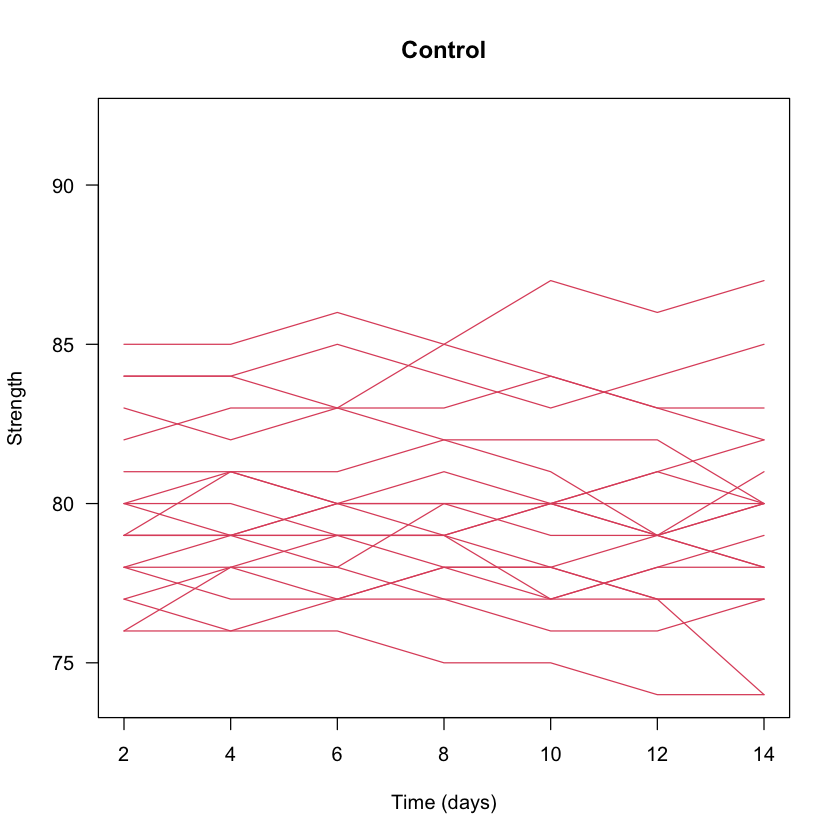

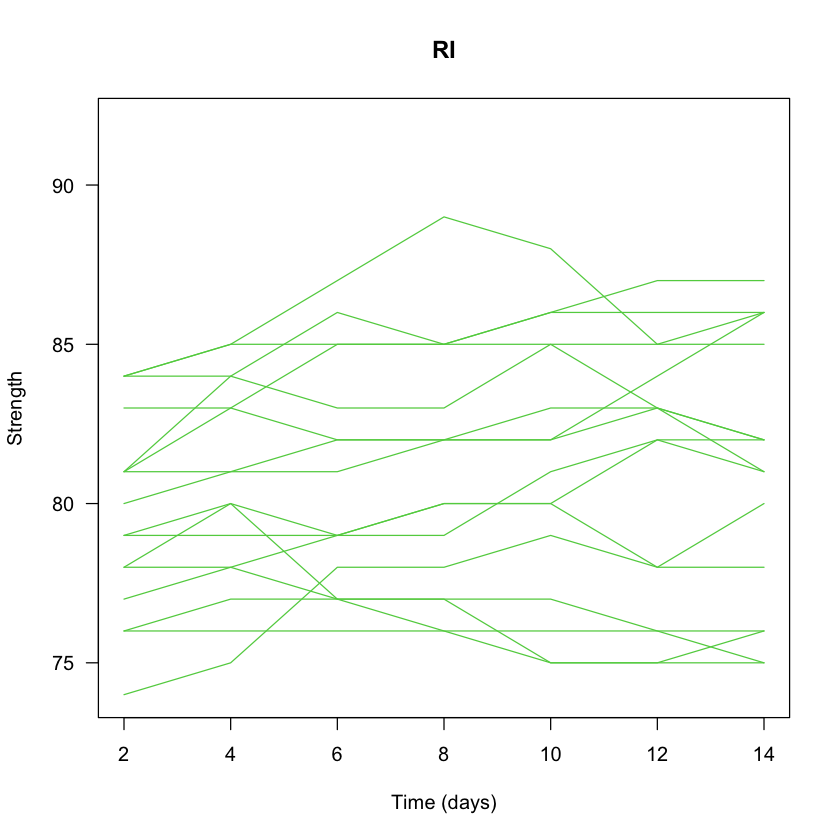

In [34]:
# Slide 47:

plot(rep(2*(1:7),57),unlist(strength[,-(1:2)]),pch="",xlab="Time (days)",
     ylab="Strength",las=1,main="Control")
for(i in 1:20){
  lines(2*(1:7),strength[i,-(1:2)],type="l",col=(2:4)[strength$program[i]])
  }
plot(rep(2*(1:7),57),unlist(strength[,-(1:2)]),pch="",xlab="Time (days)",
     ylab="Strength",las=1,main="RI")
for(i in 21:36){
  lines(2*(1:7),strength[i,-(1:2)],type="l",col=(2:4)[strength$program[i]])
  }

$cont
   S1    S2    S3    S4    S5    S6    S7 
79.75 79.95 80.00 80.05 79.80 79.60 79.60 

$ri
     S1      S2      S3      S4      S5      S6      S7 
79.6875 80.5625 80.8125 81.0000 81.2500 81.1250 81.1250 

$wi
      S1       S2       S3       S4       S5       S6       S7 
81.04762 81.66667 81.90476 82.52381 82.61905 82.71429 83.09524

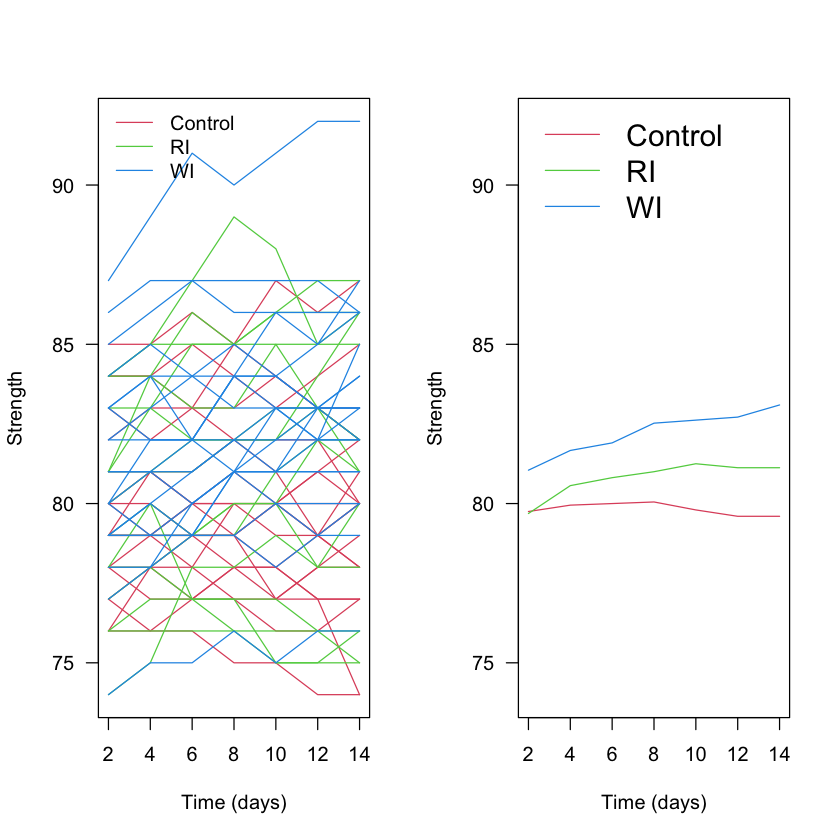

In [35]:
# Slide 48:
par(mfrow=c(1,2))
plot(rep(2*(1:7),57),unlist(strength[,-(1:2)]),pch="",xlab="Time (days)",
     ylab="Strength",las=1)
for(i in 1:57){
  lines(2*(1:7),strength[i,-(1:2)],type="l",col=(2:4)[strength$program[i]])
  }
legend("topleft",legend=c("Control","RI","WI"),col=2:4,lty=1,bty="n")

plot(rep(2*(1:7),57),unlist(strength[,-(1:2)]),pch="",xlab="Time (days)",
     ylab="Strength",las=1)
(mean.curves<-tapply(strength[,-(1:2)],strength$program,colMeans))
lines(2*(1:7),mean.curves$co,type="l",col=2)
lines(2*(1:7),mean.curves$ri,type="l",col=3)
lines(2*(1:7),mean.curves$wi,type="l",col=4)
legend("topleft",legend=c("Control","RI","WI"),col=2:4,lty=1,bty="n",cex=1.5)
par(mfrow=c(1,1))

In [36]:
# slide 53: 

strength2<-data.frame(subject=rep(1:dim(strength)[1],each=7))
strength2$program<-rep(strength$program,each=7)
strength2$time<-rep(2*(1:7),dim(strength)[1])
strength2$strength<-c(t(as.matrix(strength[,3:9])))
head(strength2)

,subject,program,time,strength
,<int>,<fct>,<dbl>,<int>
1,1,cont,2,85
2,1,cont,4,85
3,1,cont,6,86
4,1,cont,8,85
5,1,cont,10,87
6,1,cont,12,86


In [37]:
# Slide 54:
library(nlme)
model1 <- lme(strength ~ time+I(time^2)+program,
              random = ~1 | subject, data = strength2,method="ML")

anova(model1)

,numDF,denDF,F-value,p-value
,<int>,<dbl>,<dbl>,<dbl>
(Intercept),1,340,39860.989341,0.000000e+00
time,1,340,31.766664,3.654285e-08
I(time^2),1,340,7.668130,5.928805e-03
program,2,54,3.194884,4.882258e-02


In [38]:
# Slide 55:

model1 <- lme(strength ~ time+I(time^2)+program-1,
              random = ~1 | subject, data = strength2,method="REML")
summary(model1)

3.097147^2/(3.097147^2 + 1.128686^2)

Linear mixed-effects model fit by REML
  Data: strength2 
       AIC     BIC    logLik
  1477.285 1505.12 -731.6425

Random effects:
 Formula: ~1 | subject
        (Intercept) Residual
StdDev:    3.097147 1.128686

Fixed effects:  strength ~ time + I(time^2) + program - 1 
               Value Std.Error  DF   t-value p-value
time         0.26117 0.0667580 341   3.91224  0.0001
I(time^2)   -0.01133 0.0040779 341  -2.77849  0.0058
programcont 78.63847 0.7347113  54 107.03317  0.0000
programri   79.61169 0.8136212  54  97.84858  0.0000
programwi   81.04153 0.7186991  54 112.76142  0.0000
 Correlation: 
            time   I(t^2) prgrmc prgrmr
I(time^2)   -0.977                     
programcont -0.293  0.266              
programri   -0.265  0.241  0.085       
programwi   -0.299  0.272  0.097  0.087

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-3.35926872 -0.62145967  0.02746932  0.57453294  3.12690117 

Number of Observations: 399
Numb

[1] 0.8827625

,Value,Std.Error,DF,t-value,p-value
time,0.26117377,0.066758032,341,3.912245,1.103833e-04
I(time^2),-0.01133041,0.004077896,341,-2.778494,5.763578e-03
programcont,78.63847118,0.734711251,54,107.033166,1.446154e-64
programri,79.61168546,0.813621243,54,97.848583,1.793276e-62
programwi,81.04153240,0.718699138,54,112.761416,8.767784e-66


time   I(time^2) programcont   programri   programwi 
 0.26117377 -0.01133041 78.63847118 79.61168546 81.04153240

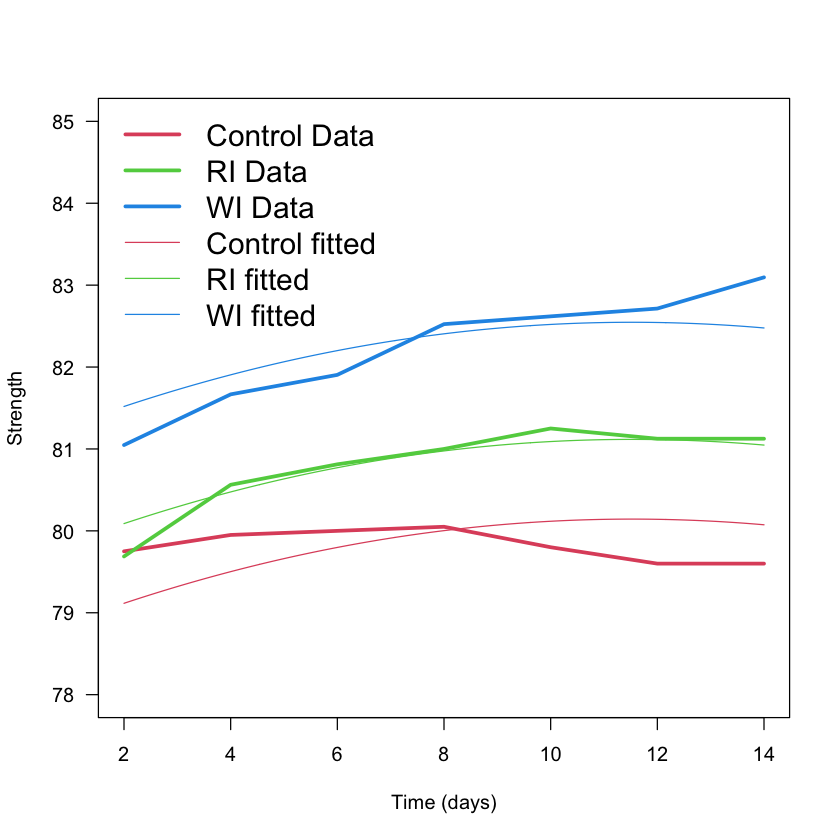

In [39]:
# Slide 56:

summary(model1)$tTable
(my.coef<-summary(model1)$tTable[,1])

plot(rep(2*(1:7),57),unlist(strength[,-(1:2)]),pch="",xlab="Time (days)",
     ylab="Strength",las=1,ylim=c(78,85))
lines(2*(1:7),mean.curves$co,type="l",col=2,lwd=3)
lines(2*(1:7),mean.curves$ri,type="l",col=3,lwd=3)
lines(2*(1:7),mean.curves$wi,type="l",col=4,lwd=3)
legend("topleft",legend=c("Control Data","RI Data","WI Data",
                          "Control fitted","RI fitted","WI fitted"),
col=rep(2:4,2),lwd=c(rep(3,3),rep(1,3)),lty=1,bty="n",cex=1.5)

index<-2*(100:700)/100
my.prediction1<- my.coef[3] + index*my.coef[1] + index^2*my.coef[2]
my.prediction2<- my.coef[4] + index*my.coef[1] + index^2*my.coef[2]
my.prediction3<- my.coef[5] + index*my.coef[1] + index^2*my.coef[2]
 
lines(index,my.prediction1,type="l",col=2)
lines(index,my.prediction2,type="l",col=3)
lines(index,my.prediction3,type="l",col=4)

par(mfrow=c(1,1))

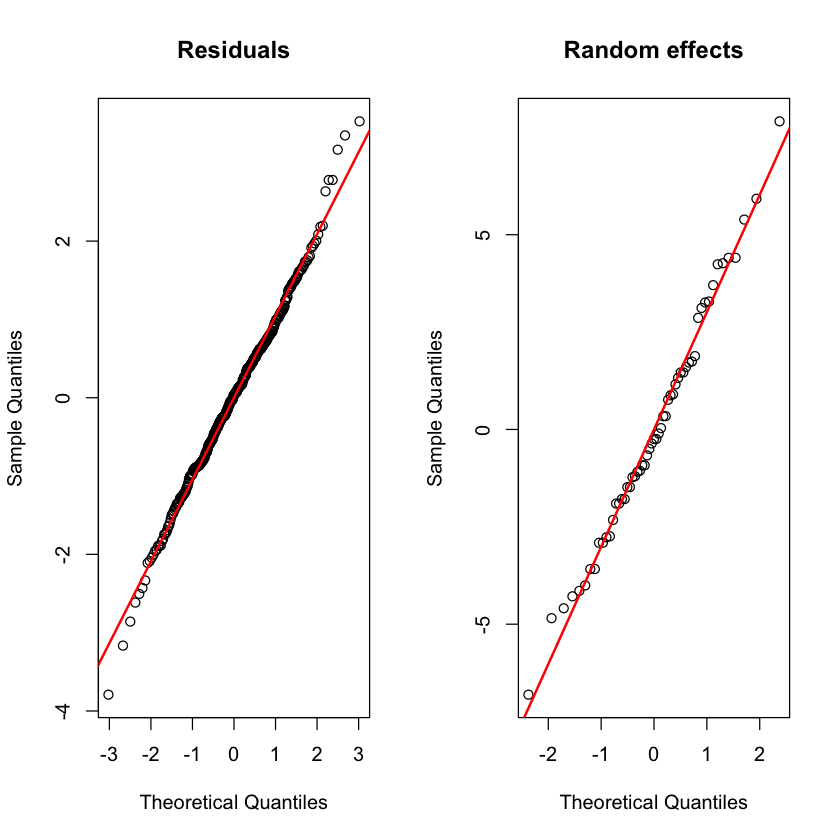

In [40]:
# Slide 57:
par(mfrow=c(1,2))
qqnorm(residuals(model1),main="Residuals")
lines((-5):5,sd(residuals(model1))*(-5):5,lwd=2,col="red")

qqnorm(unlist(ranef(model1)),main="Random effects")
lines((-5):5,sd(unlist(ranef(model1)))*(-5):5,lwd=2,col="red")
par(mfrow=c(1,2))

In [41]:
# Slide 61:

model2<-lme(strength ~ time+I(time^2)+program,random=~1|subject,
            correlation=corGaus(form=~time|subject,nugget=T),method="ML",
            data=strength2)

anova(model2)

,numDF,denDF,F-value,p-value
,<int>,<dbl>,<dbl>,<dbl>
(Intercept),1,340,40750.609038,0.0000000000
time,1,340,13.561658,0.0002684392
I(time^2),1,340,7.279134,0.0073239808
program,2,54,3.339550,0.0429116459


Linear mixed-effects model fit by maximum likelihood
  Data: strength2 
       AIC      BIC    logLik
  1293.076 1328.976 -637.5379

Random effects:
 Formula: ~1 | subject
        (Intercept) Residual
StdDev:    2.721507 1.712461

Correlation Structure: Gaussian spatial correlation
 Formula: ~time | subject 
 Parameter estimate(s):
    range    nugget 
8.5026559 0.1394383 
Fixed effects:  strength ~ time + I(time^2) + program 
               Value Std.Error  DF   t-value p-value
(Intercept) 78.59614 0.7169227 340 109.62988  0.0000
time         0.26941 0.0701932 340   3.83810  0.0001
I(time^2)   -0.01105 0.0040960 340  -2.69799  0.0073
programri    0.80658 1.0135572  54   0.79579  0.4296
programwi    2.39869 0.9441463  54   2.54060  0.0140
 Correlation: 
          (Intr) time   I(t^2) prgrmr
time      -0.270                     
I(time^2)  0.182 -0.934              
programri -0.628  0.000  0.000       
programwi -0.675  0.000  0.000  0.477

Standardized Within-Group Residuals:
        

[1] 7.4066

[1] 2.523617

[1] 0.408906

[1] 10.33912

[1] 0.5328369 1.0042995 1.3448489 1.9015480 2.4949542 2.7086466

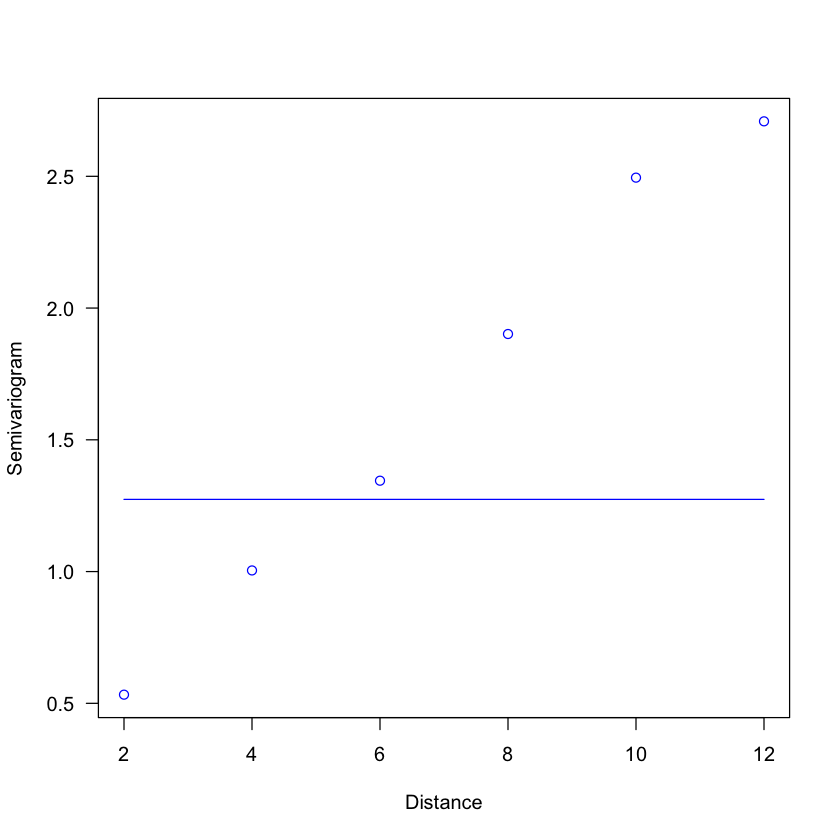

In [42]:
# Slide 62:

summary(model2)

#nu2:
2.721507^2

# tau2:
1.712461^2-0.1394383*1.712461^2

# sigma2:
0.1394383*1.712461^2

# total:

2.721507^2+2.523617+0.408906

# Slide 67:
gamma<-numeric(6)

gamma[1]<-var(c(strength$S2-strength$S1,strength$S3-strength$S2,
                strength$S4-strength$S3,strength$S5-strength$S4,
                strength$S6-strength$S5,strength$S7-strength$S6))/2

gamma[2]<-var(c(strength$S3-strength$S1,strength$S4-strength$S2,
                strength$S5-strength$S3,strength$S6-strength$S4,
                strength$S7-strength$S5))/2

gamma[3]<-var(c(strength$S4-strength$S1,strength$S4-strength$S2,
                strength$S6-strength$S3,strength$S7-strength$S4))/2

gamma[4]<-var(c(strength$S5-strength$S1,strength$S6-strength$S2,
                strength$S7-strength$S3))/2

gamma[5]<-var(c(strength$S6-strength$S1,strength$S7-strength$S1))/2

gamma[6]<-var(c(strength$S7-strength$S1))/2
gamma

plot(2*(1:6),gamma,col="blue",xlab="Distance",ylab="Semivariogram",las=1)

sigma2hat<-as.numeric(VarCorr(model1)[2,1])
lines(2*(1:6),rep(sigma2hat,6),col="blue")

In [ ]:
# Slide 68:
plot(Variogram(model2,form=~time|subject,data=strength2))